# 텍스트 마이닝 복습하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

from scipy import stats
from statsmodels.formula.api import ols, glm

## 데이터 확인하기

In [2]:
# 기본 path 잡기
path = '../datasets/ML_data/'

In [3]:
raw = pd.read_csv(path+'winequality-red.csv', sep=';', header=0)
df_red = raw.copy()
print(df_red.shape)
df_red.head(2)

(1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

In [4]:
raw = pd.read_csv(path+'winequality-white.csv', sep=';', header=0)
df_white = raw.copy()
print(df_white.shape)
df_white.head(2)

(4898, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6

## 데이터 병합하기

In [5]:
# 새로운 컬럼 만들기 - type (red / white)
# insert() : 원하는 자리에 새로운 컬럼을 넣을 수 있음.
df_red.insert(0, column='type', value='red')
df_white.insert(0, column='type', value='white')

In [6]:
merge = pd.concat([df_red, df_white]).reset_index(drop=True)
wine = merge.copy()
print(wine.shape)
wine.head(2)

(6497, 13)


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70          0.0             1.9   
1  red            7.8              0.88          0.0             2.6   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5

In [ ]:
# 새로 만든 DF를 csv로 저장하기
# wine.to_csv('', index=False)

## EDA
* 데이터 수집
* 데이터 정제 및 전처리
* 데이터 구조파악
* 데이터 시각화
* 상관관계 분석
* 가설설정 및 추가 분석
* 데이터 분석 준비
* 결과 도출 및 해석도출 및 해석

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
# 컬럼명에 있는 띄어쓰기를 밑줄로 바꾸기
wine.columns = wine.columns.str.replace(' ', '_')

In [9]:
wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

### 이상치 확인하기

In [10]:
wine.columns[1:-1]

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

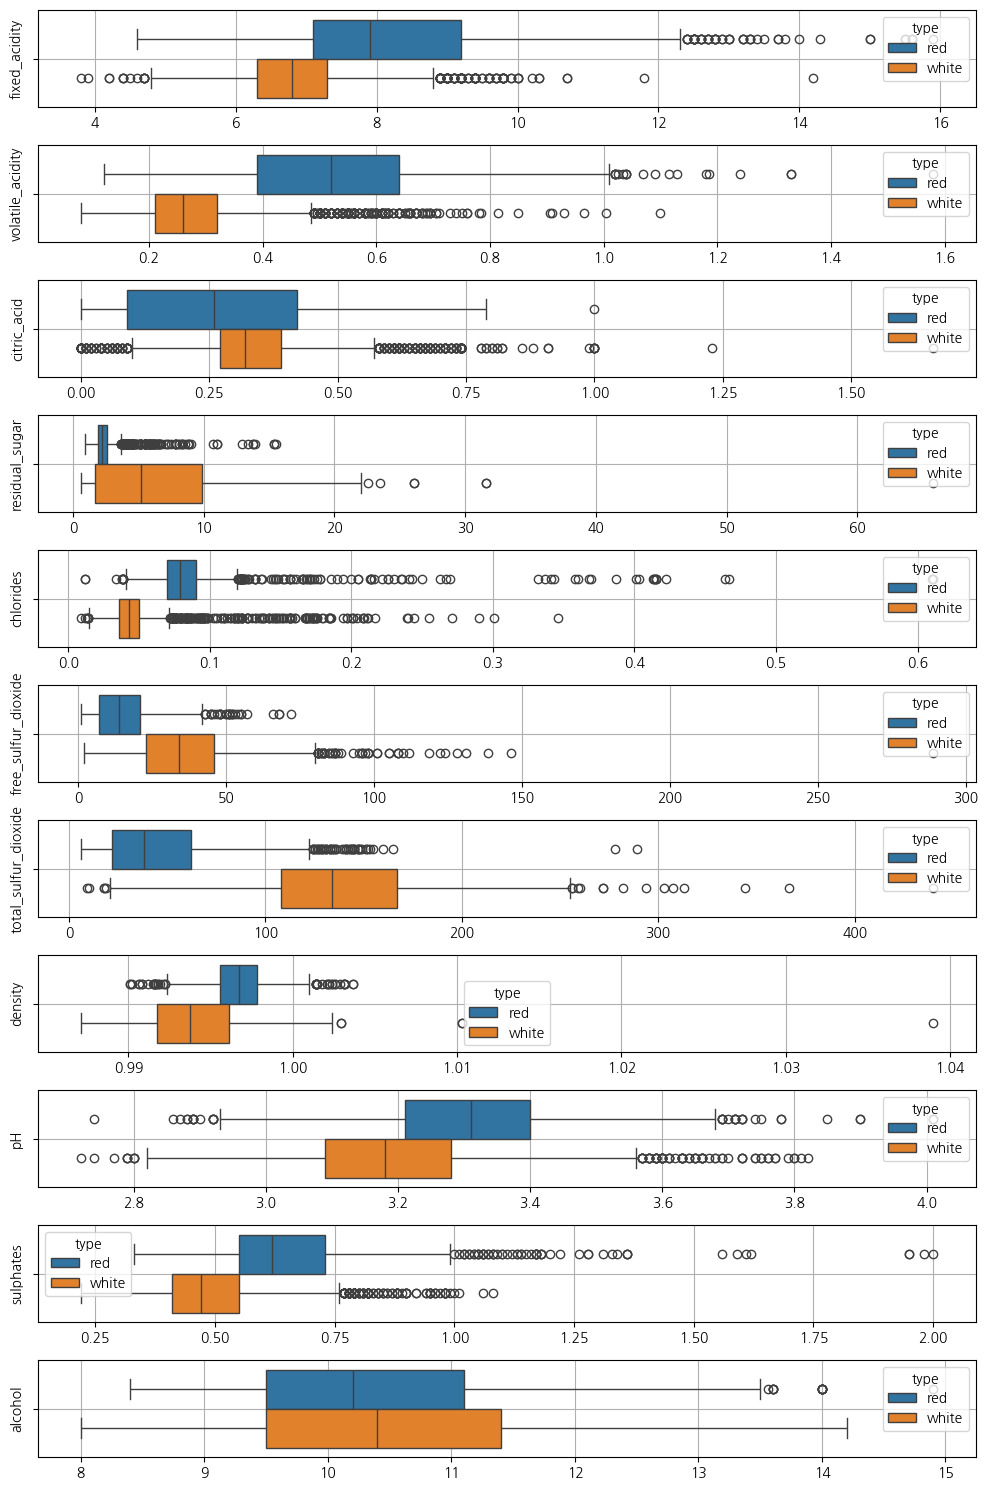

In [11]:
# boxplot
fig, ax = plt.subplots(11, 1, figsize=(10, 15))

for i, column in enumerate(wine.columns[1:-1]):
    sns.boxplot(data=wine.iloc[:, :-1], x=column, hue='type', vert=False, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(column)
    ax[i].grid()

plt.tight_layout()
plt.show()

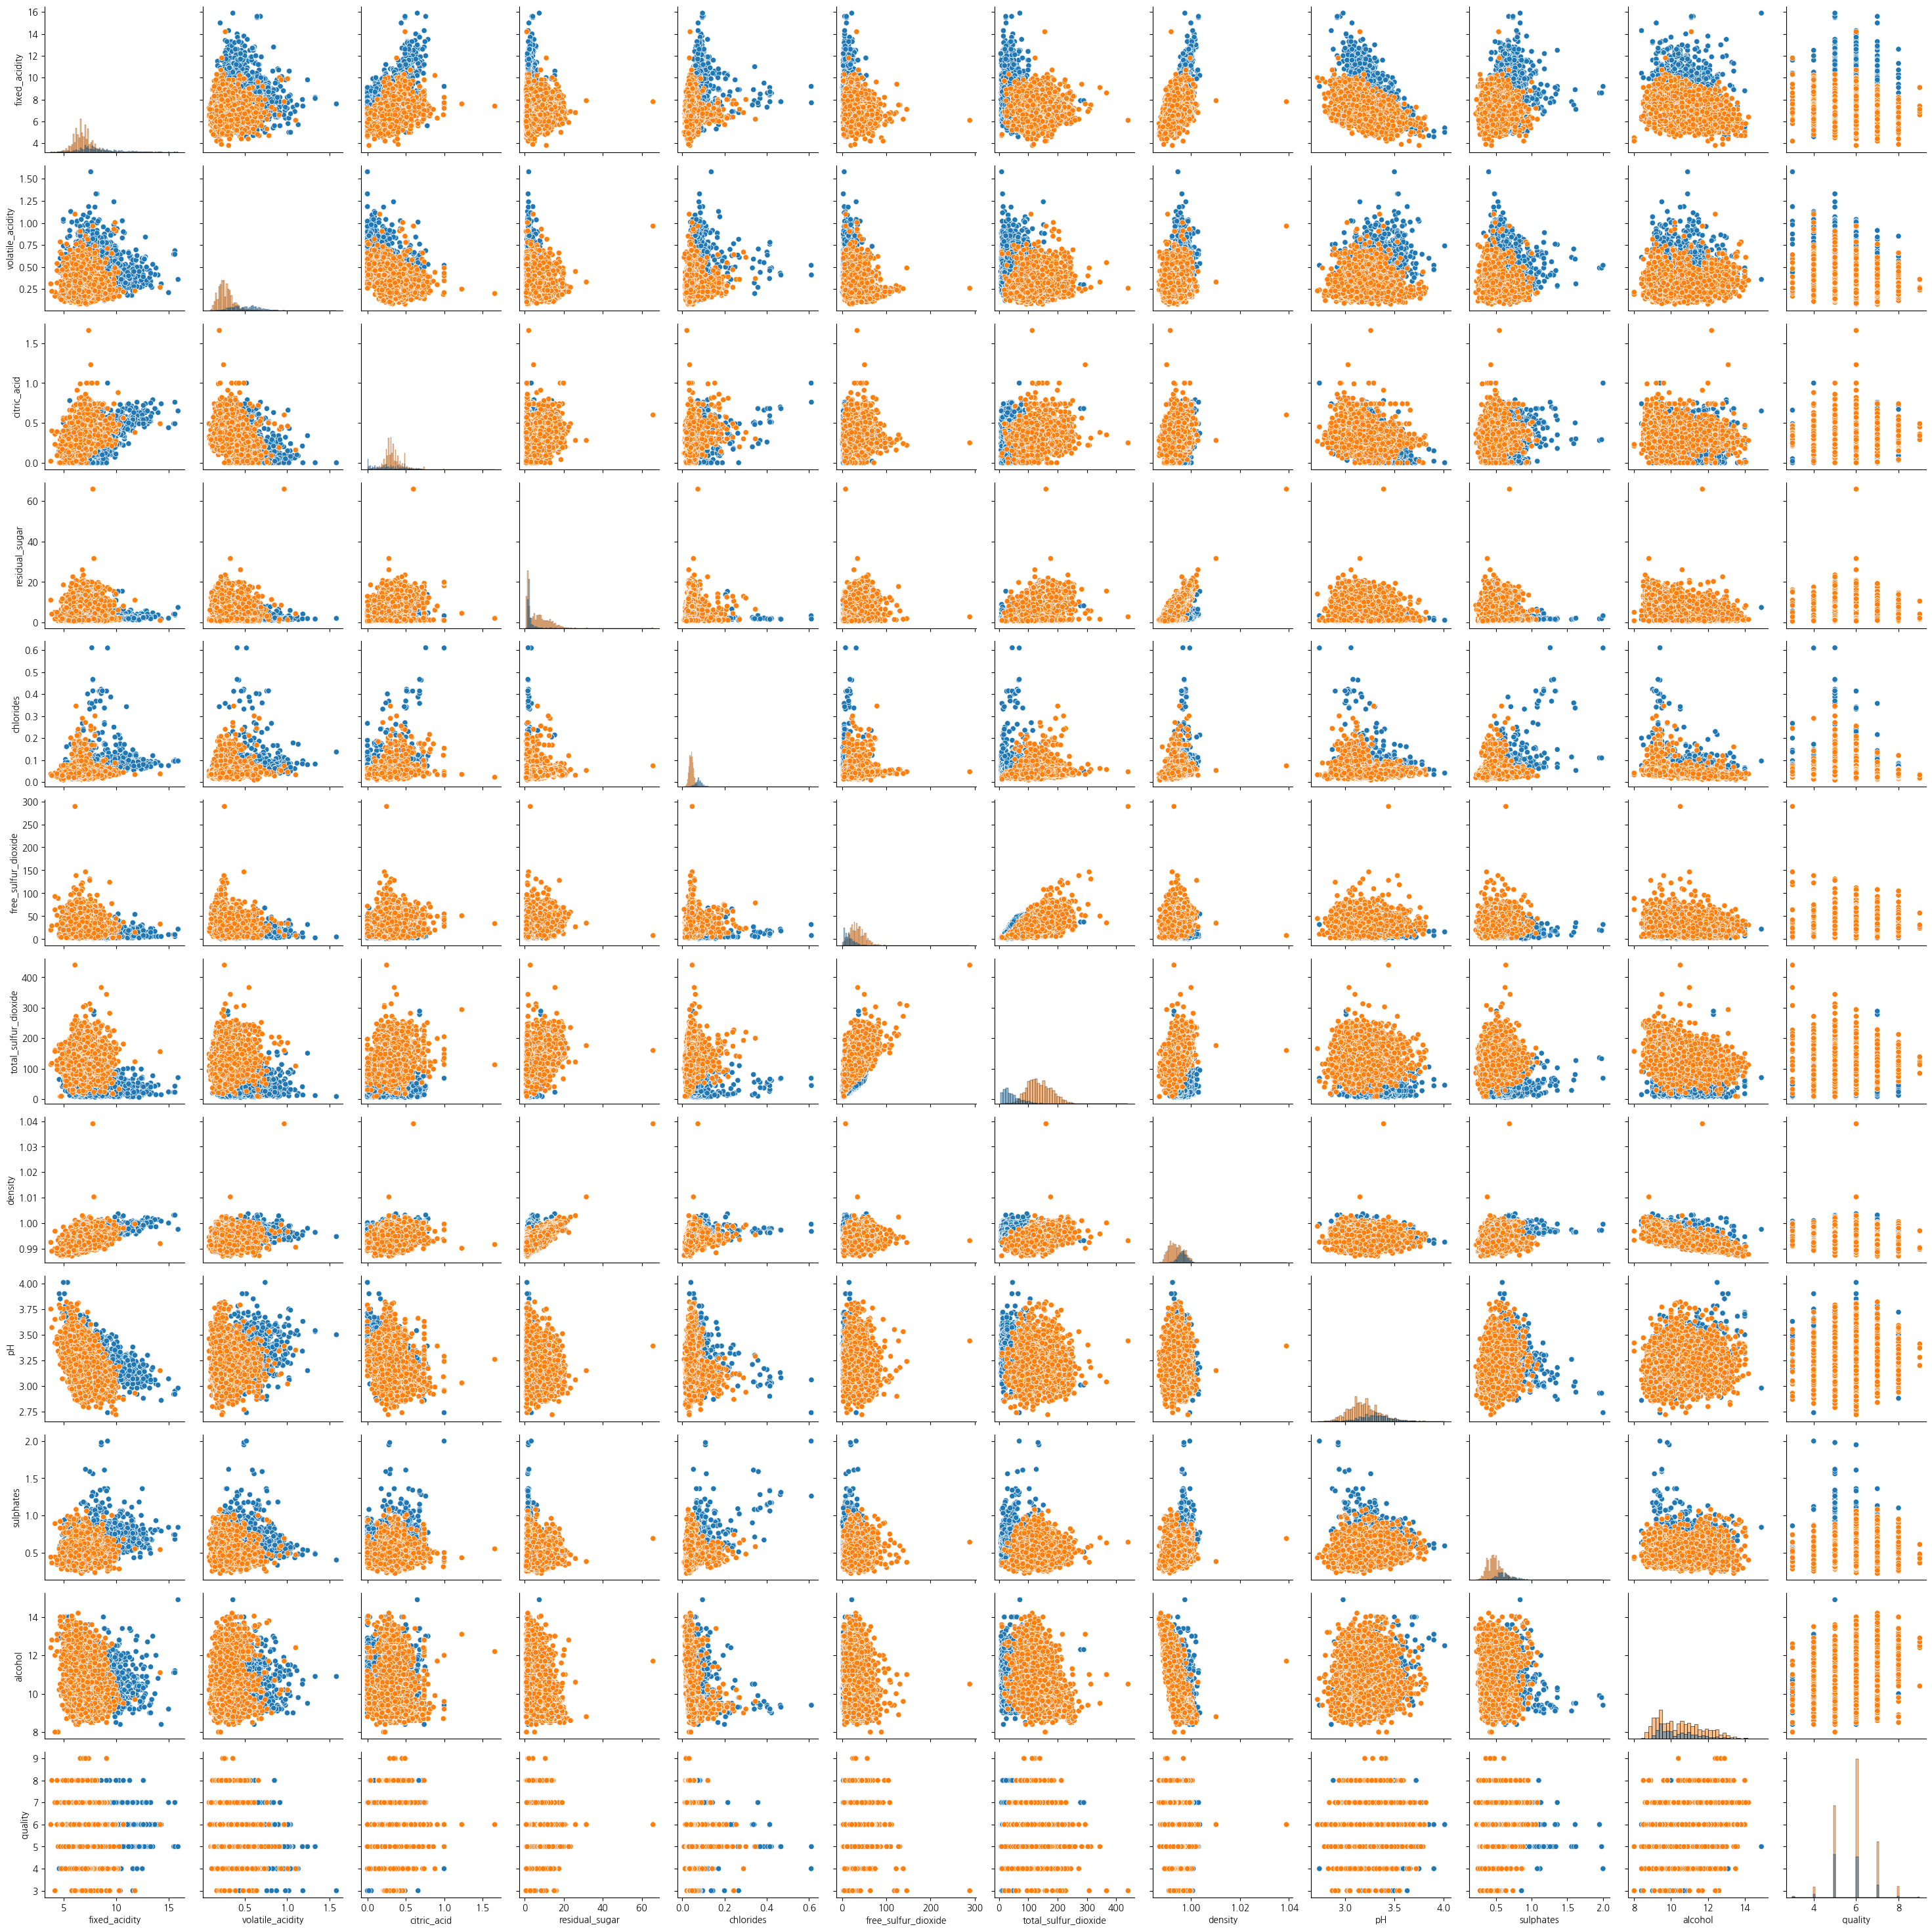

In [12]:
# 산점도 확인하기
g = sns.PairGrid(data=wine, hue='type')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

plt.show()

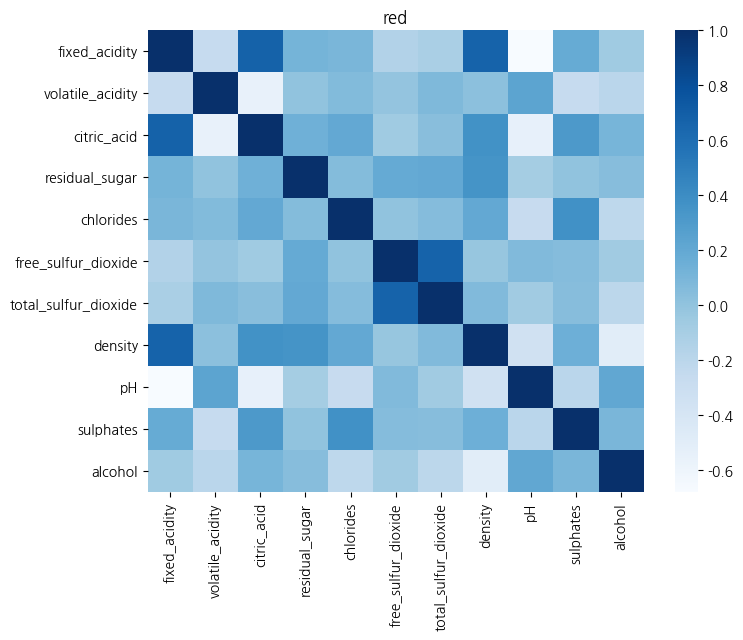

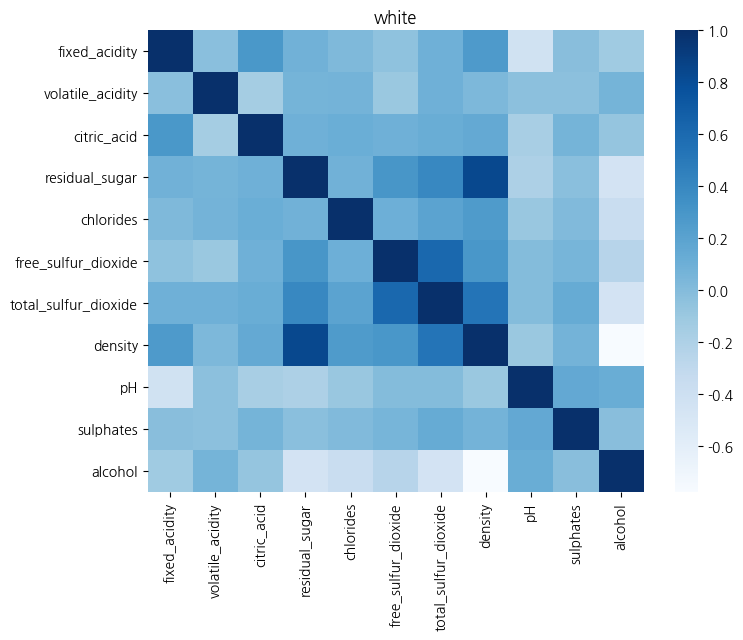

In [13]:
# 히트맵 - type 나눠서 확인하기
wine_red = wine[wine.type == 'red']
wine_white = wine[wine.type == 'white']

for data in [wine_red, wine_white]:
    data_ = data.iloc[:, 1:-1].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(data_, cmap='Blues')
    plt.title(data.type.unique()[0])
    plt.show()

# 독립표본 T 검정

In [14]:
# 여기서 유일한 이산형 변수 : quality (서열변수)
wine_red.quality.unique(), wine_white.quality.unique()

(array([5, 6, 7, 4, 8, 3], dtype=int64),
 array([6, 5, 7, 8, 4, 3, 9], dtype=int64))

In [15]:
# 각 타입의 개수 확인하기 --> 각 개수가 30개 이상이기 때문에 정규성을 만족한다고 할 수 있음.
print('red wine의 개수 :', wine_red.shape[0])
print('white wine의 개수 :', wine_white.shape[0])

red wine의 개수 : 1599
white wine의 개수 : 4898


In [16]:
# 분산 통일성 검사를 한다. --> Levene's Test
from scipy.stats import levene
levene(wine_red.quality, wine_white.quality)

LeveneResult(statistic=2.3327077520087762, pvalue=0.1267300410918103)

In [17]:
# 분산이 동질함을 확인함.
# student's t test
stats.ttest_ind(wine_red.quality, wine_white.quality, equal_var=True)

TtestResult(statistic=-9.685649554187696, pvalue=4.888069044201508e-22, df=6495.0)

위의 결과로 보아 pvalue가 0.05보다 작기 때문에 두 집단 간의 유의한 차이가 발견되었음을 알 수 있음.

## 회귀 분석

In [18]:
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [19]:
# formula 문자열을 사용하여 모형을 만들 수도 있다.
# formula 문자열을 만드는 방법은 ~ 기호의 왼쪽에 종속변수의 이름을 넣고 ~ 기호의 오른쪽에 독립변수의 이름을 넣는다.
rformula = \
'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [20]:
result = ols(rformula, data=wine).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:46:23   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
rformula = \
'quality ~ fixed_acidity + volatile_acidity + residual_sugar + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

result = ols(rformula, data=wine).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:46:23   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               60.0409     11.645      5.156      0.000      37.212      82.870
fixed_acidity            0.0662      0.015      4.412      0.000       0.037       0.096
volatile_acidity        -1.3043      0.071    -18.445      0.000      -1.443      -1.166
residual_sugar           0.0453      0.005      9.024      0.000       0.035       0.055
free_sulfur_dioxide      0.0059      0.001      7.911      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -9.217      0.000      -0.003      -0.002
density                -59.4185     11.873     -5.004      0.000     -82.694     -36.143
pH                       0.4782      0.088      5.411      0.000       0.305       0.651
sulphates                0.7378      0.075      9.903      0.000       0.592       0.884
alcohol                  0.2647      0.017     15.886      0.000       0.232       0.297
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.085
Skew:                          -0.004   Prob(JB):                     2.56e-71
Kurtosis:                       4.096   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 회귀 분석 모델로 새로운 샘플 품질 등급 예측하기

In [22]:
# []안의 컬럼명 제외하고 출력
# difference() : DF에서만 사용가능함.
# 조건 설정
condition = wine.columns.difference(['quality', 'type'])

# 조건에 맞는 컬럼을 포함한 데이터 변수에 저장
sample1 = wine[condition]
sample1.head(2)

alcohol  chlorides  citric_acid  density  fixed_acidity  \
0      9.4      0.076          0.0   0.9978            7.4   
1      9.8      0.098          0.0   0.9968            7.8   

   free_sulfur_dioxide    pH  residual_sugar  sulphates  total_sulfur_dioxide  \
0                 11.0  3.51             1.9       0.56                  34.0   
1                 25.0  3.20             2.6       0.68                  67.0   

   volatile_acidity  
0              0.70  
1              0.88

In [23]:
# 위에서 5개의 샘플만 뽑아서 저장하기
sample1_top5 = sample1[:5][:]

# 모델에 적용해서 예측하기
y_pred = result.predict(sample1_top5)
y_pred

0    4.975950
1    4.905454
2    5.016237
3    5.687222
4    4.975950
dtype: float64

In [24]:
# sample1_top5의 실제 quality 값
wine[:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## 결과 시각화 하기

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_27920\1742031325.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_red.quality, kde=True, color='red', label='red wine')
C:\Users\tjdtn\AppData\Local\Temp\ipykernel_27920\1742031325.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_white.

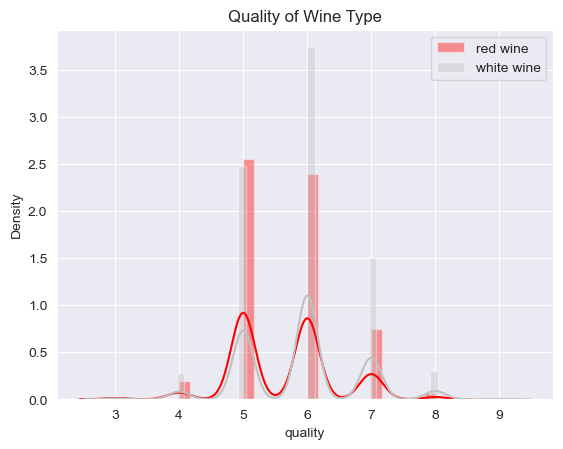

In [25]:
# 와인 유형에 따른 품질 등급 히스토그램 그리기
sns.set_style('dark')
sns.distplot(wine_red.quality, kde=True, color='red', label='red wine')
sns.distplot(wine_white.quality, kde=True, color='silver', label='white wine')
plt.title('Quality of Wine Type')
plt.legend()
plt.grid()
plt.show()

## 부분회귀플롯 시각화

In [26]:
import statsmodels.api as sm

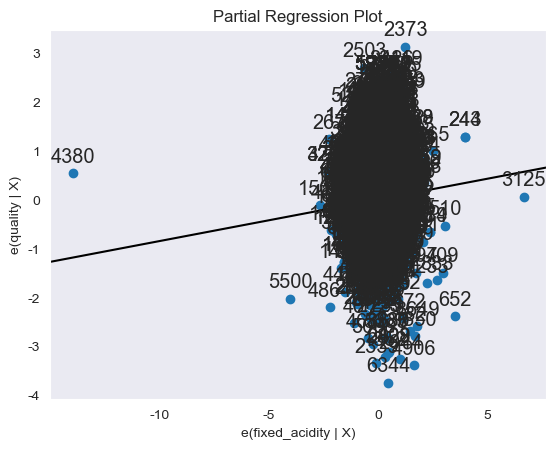

In [27]:
# fixed acidity가 quality에 미치는 영향력 시각화하기
# quality, fixed acidity를 제외한 컬럼 변수 저장하기
others = list(wine.columns.difference(['quality', 'fixed_acidity']))

# plot_partregress
# 종속변수 : 'quality' , 독립변수 : 'fixed_acidity', 통제변수 : others
# ret_coords=True : 부분회귀 플롯의 점들의 좌표변환
p, resids = sm.graphics.plot_partregress('quality', 'fixed_acidity', others, data=wine, ret_coords=True)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

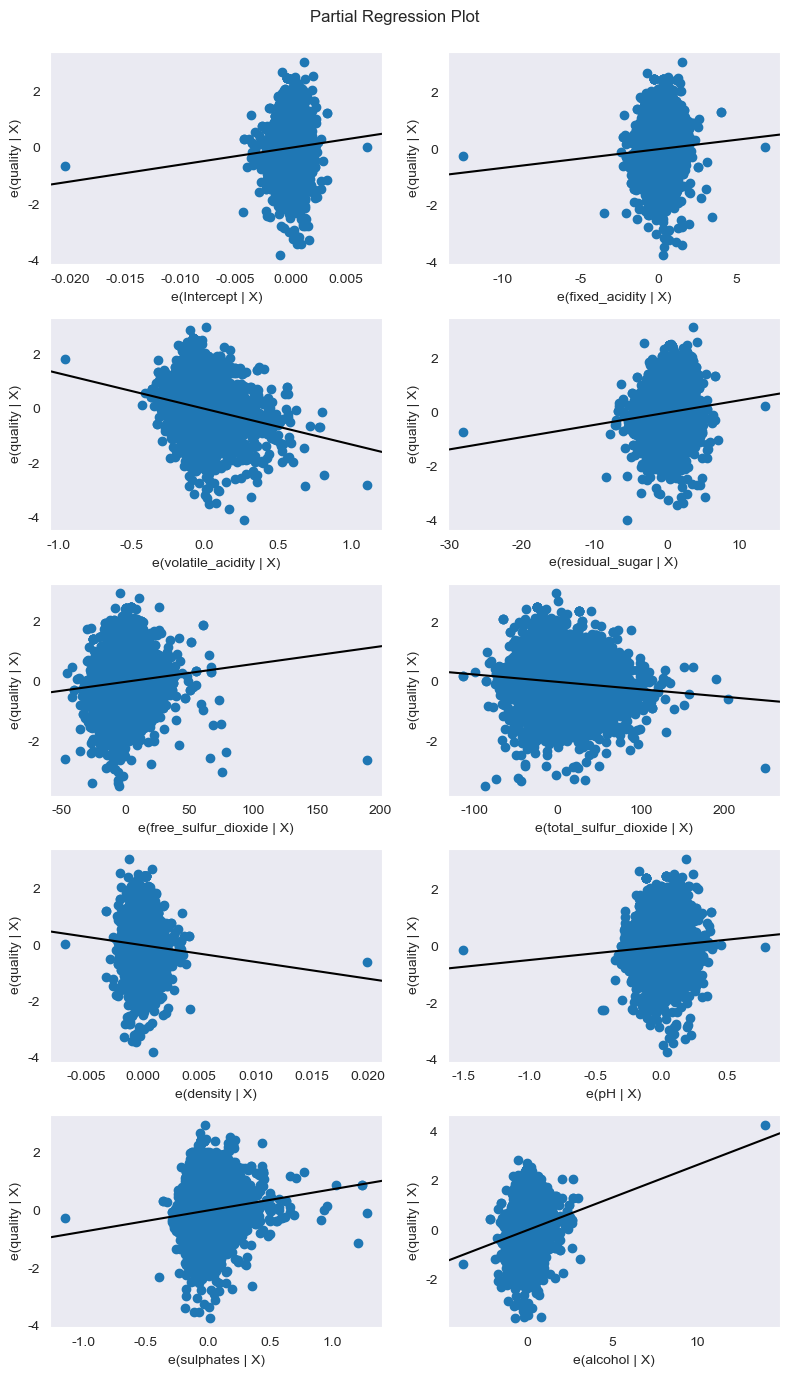

In [28]:
# 각 독립변수가 종속변수에 미치는 영향 시각화하기
# 종속변수 : quality
fig = plt.figure(figsize=(8, 14))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

# 상관분석 & 히트맵

In [29]:
# 타이타닉 데이터 불러오기
raw = sns.load_dataset('titanic')
titanic = raw.copy()
print(titanic.shape)
titanic.head(2)

(891, 15)


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False

In [30]:
# 결측치 여부 확인하기
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [31]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
# age 결측값 처리하기
# 평균 or 중양값 사용할 예정
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [34]:
# age 결측치 --> 평균으로 치환
titanic.age.fillna(titanic.age.mean())

# age 결측치 --> 중앙값으로 치환
titanic.age.fillna(titanic.age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [35]:
# 중앙값으로 치환 결정하기
titanic.age = titanic.age.fillna(titanic.age.median())

In [38]:
titanic.age.isnull().sum() # 결측치 없음을 확인함.

0

In [40]:
# embarked 결측치 --> 최빈값 치환
titanic.embarked.value_counts() #--> S가 가장 많음.

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [41]:
titanic.embarked = titanic.embarked.fillna('S')

In [43]:
# 중복 정보 제거하기
# embarked와 embark_town은 같은 정보이기 때문에 embark_town을 제거해준다.
titanic = titanic.drop(columns='embark_town')

In [45]:
# deck에 너무 많은 결측치가 존재한다는 것을 발견!
# 결측치가 너무 많아 제거해야겠음.
titanic = titanic.drop(columns='deck')

In [46]:
# 결측치 확인
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

## EDA
* 우리가 알고 싶은 것은 생존율에 관한 것이다.

In [48]:
# 생존율 확인하기
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [50]:
# 생존율과 남성의 관계 확인하기
titanic[titanic.sex == 'male'].survived.value_counts()

survived
0    468
1    109
Name: count, dtype: int64

In [51]:
# 생존율과 여성의 관계 확인하기
titanic[titanic.sex == 'female'].survived.value_counts()

survived
1    233
0     81
Name: count, dtype: int64

수치를 확인해 본 결과

남성인 경우, 생존율이 낮고, 여성인 경우, 생존율이 높다는 것을 확인함.

In [53]:
# 성별을 숫자로 바꿔주기 --> 원핫인코딩
# 남성 : 0, 여성 : 1
titanic.sex.replace(['male', 'female'], [0, 1], inplace=True)

In [54]:
# embarked 확인하기
titanic.embarked.value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [55]:
# embarked를 숫자로 바꿔주기 --> 정수인코딩
# S : 1, C : 2, Q : 3
titanic.embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

## 시각화

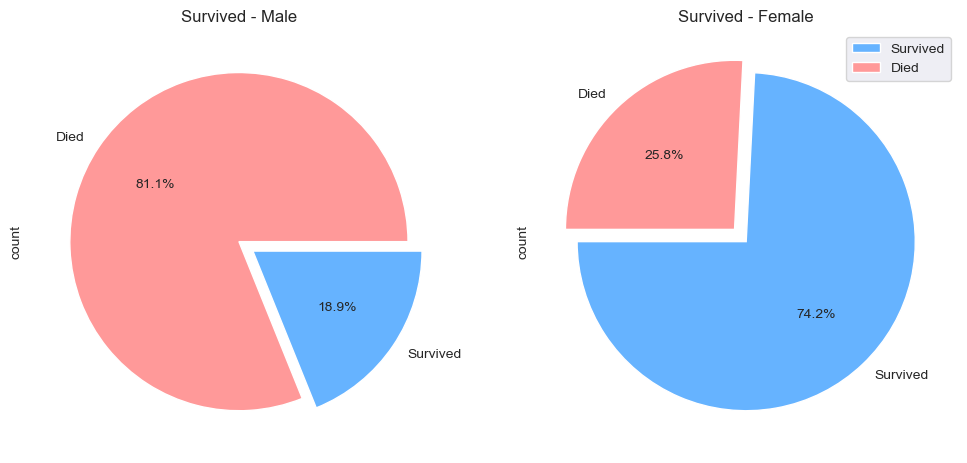

In [59]:
# 파이차트 그리기
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

titanic[titanic.sex == 0].survived.value_counts().plot.pie(
    # explode : 파이차트의 두 번째 조각을 약간 떨어뜨려 강조하기
    explode=[0, 0.1],
    colors=['#ff9999', '#66b3ff'],
    # 자동으로 퍼센트 비율 표시 --> 백분율을 소수점 첫째자리까지 표시하기
    autopct='%1.1f%%',
    labels=['Died', 'Survived'],
    ax=ax[0]
)

titanic[titanic.sex == 1].survived.value_counts().plot.pie(
    # explode : 파이차트의 두 번째 조각을 약간 떨어뜨려 강조하기
    explode=[0, 0.1],
    colors=['#66b3ff', '#ff9999'],
    # 자동으로 퍼센트 비율 표시 --> 백분율을 소수점 첫째자리까지 표시하기
    autopct='%1.1f%%',
    labels=['Survived', 'Died'],
    startangle=180,
    ax=ax[1]
)

ax[0].set_title('Survived - Male')
ax[1].set_title('Survived - Female')

plt.legend(loc='best')
plt.show()

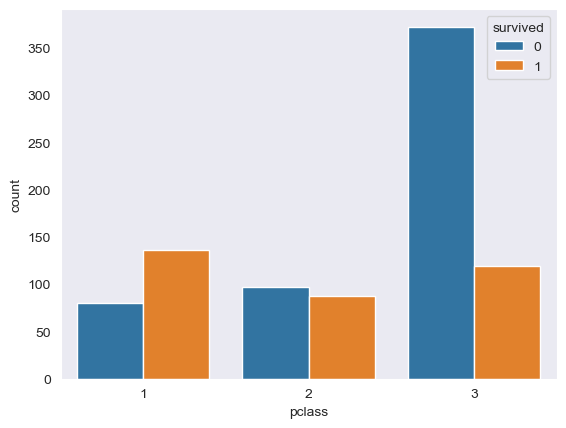

In [61]:
# pclass의 개수 확인 --> 막대 그래프
# 생존을 기준으로 개수 확인하기
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.show()

## 모델링

In [63]:
# 필요한 컬럼만 가져와서 상관관계 분석하기
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

df_corr = df.corr(method='pearson')
df_corr

survived    pclass       sex       age     sibsp     parch  \
survived  1.000000 -0.338481  0.543351 -0.064910 -0.035322  0.081629   
pclass   -0.338481  1.000000 -0.131900 -0.339898  0.083081  0.018443   
sex       0.543351 -0.131900  1.000000 -0.081163  0.114631  0.245489   
age      -0.064910 -0.339898 -0.081163  1.000000 -0.233296 -0.172482   
sibsp    -0.035322  0.083081  0.114631 -0.233296  1.000000  0.414838   
parch     0.081629  0.018443  0.245489 -0.172482  0.414838  1.000000   
fare      0.257307 -0.549500  0.182333  0.096688  0.159651  0.216225   
embarked  0.106811  0.045702  0.116569 -0.009165 -0.059961 -0.078665   

              fare  embarked  
survived  0.257307  0.106811  
pclass   -0.549500  0.045702  
sex       0.182333  0.116569  
age       0.096688 -0.009165  
sibsp     0.159651 -0.059961  
parch     0.216225 -0.078665  
fare      1.000000  0.062142  
embarked  0.062142  1.000000

In [66]:
# 상관계수 구하기
print('생졸율 - 성인남성 상관계수 :', titanic.survived.corr(titanic.adult_male))
print('생존율 - 탑승요금 상관계수 :', titanic.survived.corr(titanic.fare))

생졸율 - 성인남성 상관계수 : -0.5570800422053258
생존율 - 탑승요금 상관계수 : 0.25730652238496227


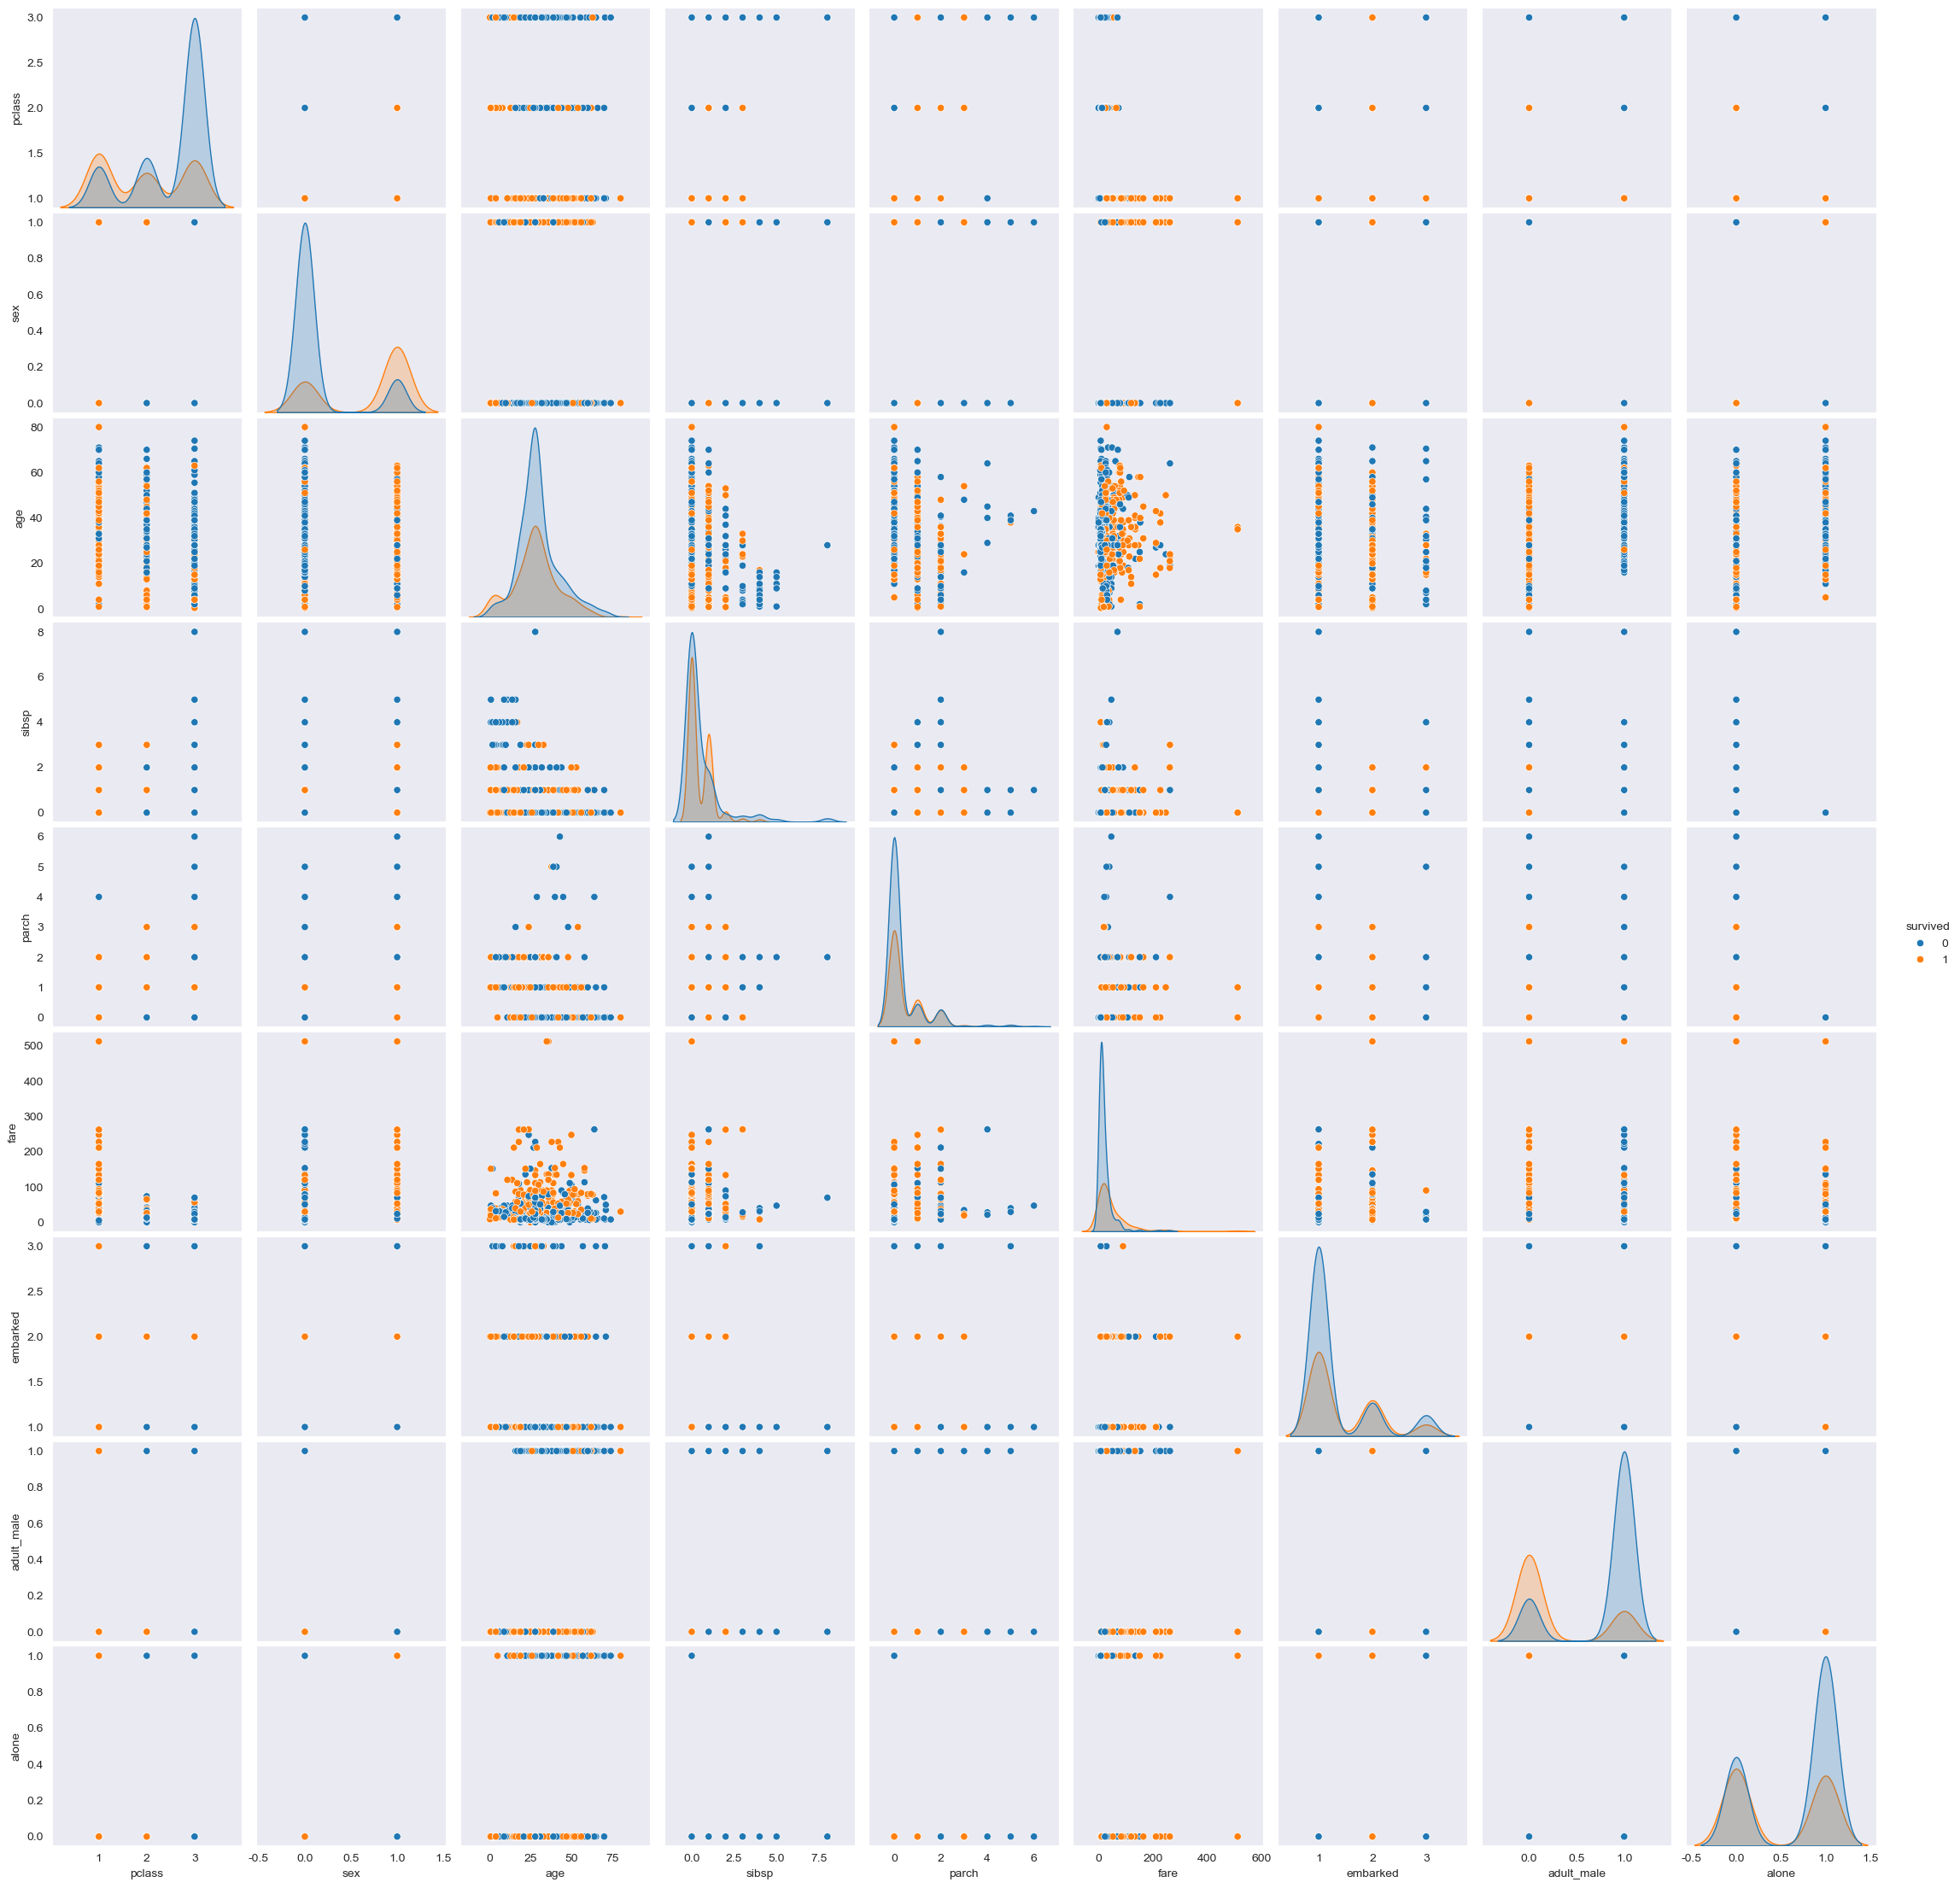

In [68]:
# 상관관계 결과 시각화하기
# 생존의 유무를 나눠서 확인하기 - hue 값 설정
sns.pairplot(titanic, hue='survived')
plt.show()

### 두 변수의 상관관계 시각화하기

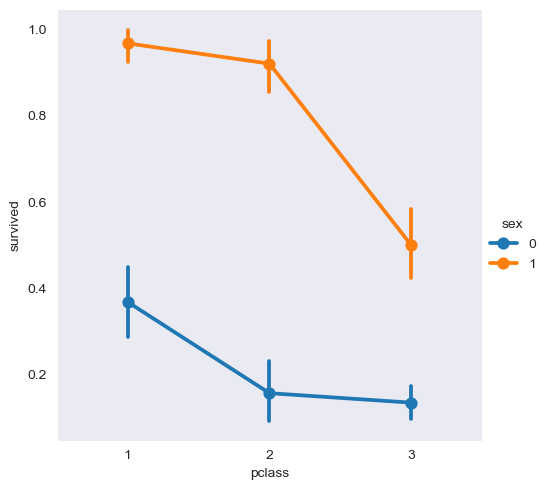

In [69]:
# 객실등급 (pclass)와 생존 (survived) 상관관계
# catplot()
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')
plt.show()

In [73]:
# 변수 사이의 상관관계를 히트맵으로 시각화하기
# 우선, 나이를 그룹화하기
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

# 위에서 만든 함수 적용하기
titanic['category_age'] = titanic.age.apply(category_age)

In [74]:
titanic.head(2)

survived  pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0         0       3    0  22.0      1      0   7.2500         1  Third    man   
1         1       1    1  38.0      1      0  71.2833         2  First  woman   

   adult_male alive  alone  category_age  
0        True    no  False             2  
1       False   yes  False             3

In [75]:
# 히트맵으로 시각화할 컬럼만 모으기
heatmap_data = titanic[['survived', 'sex', 'category_age', 'pclass', 'fare']]
heatmap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   sex           891 non-null    int64  
 2   category_age  891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   fare          891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [76]:
# 상관계수 구하기
heatmap_data.corr()

survived       sex  category_age    pclass      fare
survived      1.000000  0.543351     -0.052184 -0.338481  0.257307
sex           0.543351  1.000000     -0.074415 -0.131900  0.182333
category_age -0.052184 -0.074415      1.000000 -0.339368  0.100123
pclass       -0.338481 -0.131900     -0.339368  1.000000 -0.549500
fare          0.257307  0.182333      0.100123 -0.549500  1.000000

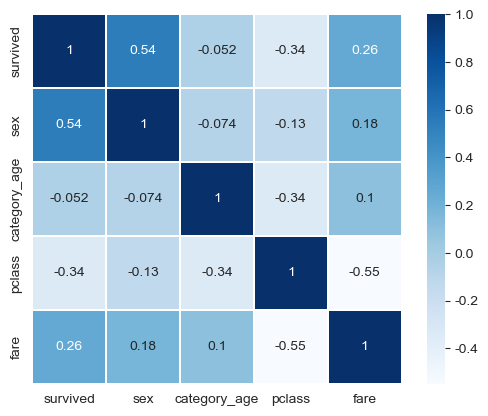

In [77]:
# 히트맵 그리기
colormap = plt.cm.Blues

# vmax : 상관계수의 최댓값 지정 / square : 정사각형 / annot_kws : 셀에 표시되는 숫자의 크기 설정
sns.heatmap(heatmap_data.corr(), linewidth=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10})
plt.show()

----------------------

# textmining ENG

In [78]:
# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import glob
import re
import nltk
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import STOPWORDS, WordCloud

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [83]:
# 파일명이 동일한 스타일로 되어있는 파일 묶어서 하나의 리스트에 담아주기
all_files = glob.glob(path+'myCabinetExcelData*.xls')

# DF로 만들어주기 + 빈 리스트에 저장
all_files_data = []

for file in all_files:
    df = pd.read_excel(file)
    df = df.drop(columns='Unnamed: 0')
    all_files_data.append(df)

all_files_data[0]

번호                                                 제목  \
0     1  Guest Editorial: Big Media Data: Understanding...   
1     2  Guest Editorial: Big Scholar Data Discovery an...   
2     3    Guest Editorial: Big Data Analytics and the Web   
3     4  Parallel computing for preserving privacy usin...   
4     5                       NoSQL databases for big data   
..  ...                                                ...   
95   96  Smart city big data analytics: An advanced review   
96   97  A watchdog approach - name-matching algorithm ...   
97   98  An intelligent approach to Big Data analytics ...   
98   99  How organisations leverage Big Data: a maturit...   
99  100  Effective and efficient distributed management...   

                                                   저자  \
0         Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.   
1          Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.   
2        Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.   
3                          Yaji, Sharath; Neelima, B.   
4   Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...   
..                                                ...   
95  Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...   
96                Kirubakaran, Anusuya; Aramudhan, M.   
97                       Verma, Neha; Singh, Jatinder   
98                        Comuzzi, Marco; Patel, Anit   
99  Cuzzocrea, Alfredo; Grasso, Giorgio Mario; Nol...   

                                 출판사   출판일  
0                            unknown  2015  
1                            unknown  2016  
2                            unknown  2016  
3                       Inderscience  2018  
4                       Inderscience  2017  
..                               ...   ...  
95             John Wiley & Sons Ltd  2019  
96                      Inderscience  2018  
97  Emerald Group Publishing Limited  2017  
98  Emerald Group Publishing Limited  2016  
99                      Inderscience  2019  

[100 rows x 5 columns]

In [85]:
# 리스트에 저장된 DF 합치기
# ignore_index : 인덱스 번호를 다시 설정해준다.
all_files_raw = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_df = all_files_raw.copy()
print(all_files_df.shape)
all_files_df.head(2)

(1000, 5)


번호                                                 제목  \
0   1  Guest Editorial: Big Media Data: Understanding...   
1   2  Guest Editorial: Big Scholar Data Discovery an...   

                                            저자      출판사   출판일  
0  Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.  unknown  2015  
1   Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.  unknown  2016

In [86]:
# # 새로 만든 DF 저장하기
# all_files_df.to_csv(path+'riss_bigdata.csv', encoding='utf-8', index=False)

## 데이터 전처리

In [87]:
# 수집한 데이터에서 제목을 추출
all_title = all_files_df.제목

In [89]:
# 영어 불용어 확인해보기
# set 함수를 이용해 겹치는 불용어가 있다면 제거하기
stopWords = set(stopwords.words('english'))

In [90]:
# 표제어 추출 모델 변수 저장하기
lemma = WordNetLemmatizer()

In [91]:
# 빈 리스트 생성
words = []

for title in all_title:
    # 정규 표현식 사용해서 영문으로 시작하는, 기호를 제외한 문자를 공백으로 변경한다.
    enWords = re.sub(r'[^a-zA-Z]+', ' ', str(title))
    # 소문자로 정규화 후, 단어 토큰화하기
    enWordsToken = word_tokenize(enWords.lower())
    # 불용어 제거한 단어
    enWordsTokenStop = [w for w in enWordsToken if w not in stopWords]
    # 표재어를 추출한 단어
    enWordsTokenStopLemma = [lemma.lemmatize(w) for w in enWordsTokenStop]
    # 리스트에 담기
    words.append(enWordsTokenStopLemma)

words

[['guest',
  'editorial',
  'big',
  'medium',
  'data',
  'understanding',
  'search',
  'mining',
  'part'],
 ['guest',
  'editorial',
  'big',
  'scholar',
  'data',
  'discovery',
  'collaboration'],
 ['guest', 'editorial', 'big', 'data', 'analytics', 'web'],
 ['parallel',
  'computing',
  'preserving',
  'privacy',
  'using',
  'k',
  'anonymisation',
  'algorithm',
  'big',
  'data'],
 ['nosql', 'database', 'big', 'data'],
 ['computation',
  'migration',
  'new',
  'approach',
  'execute',
  'big',
  'data',
  'bioinformatics',
  'workflow'],
 ['towards',
  'real',
  'time',
  'big',
  'data',
  'analytics',
  'platform',
  'health',
  'application'],
 ['new',
  'approach',
  'accurate',
  'distributed',
  'cluster',
  'analysis',
  'big',
  'data',
  'competitive',
  'k',
  'mean'],
 ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'],
 ['towards',
  'max',
  'min',
  'fair',
  'resource',
  'allocation',
  'stream',
  'big',
  'data',
  'analytics',
  's

In [92]:
# 전처리가 끝난 words는 2차원 리스트이기 때문에 reduce() 함수를 사용해서 1차원 리스트로 변환하기
words2 = list(reduce(lambda x, y : x+y, words))
print(words2)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

## 데이터 탐색 및 분석 모델 구축하기

In [93]:
# 단어 빈도 구하기
count = Counter(words2)
count

Counter({'data': 1645,
         'big': 1354,
         'analytics': 137,
         'analysis': 67,
         'based': 62,
         'using': 57,
         'system': 50,
         'science': 50,
         'management': 48,
         'challenge': 47,
         'approach': 44,
         'mining': 40,
         'new': 38,
         'research': 38,
         'health': 37,
         'model': 37,
         'cloud': 34,
         'smart': 34,
         'learning': 33,
         'opportunity': 31,
         'processing': 30,
         'technology': 28,
         'small': 27,
         'framework': 26,
         'information': 26,
         'computing': 25,
         'application': 25,
         'driven': 24,
         'social': 24,
         'issue': 24,
         'quality': 23,
         'network': 23,
         'deal': 23,
         'knowledge': 22,
         'efficient': 22,
         'review': 22,
         'use': 22,
         'era': 22,
         'healthcare': 21,
         'storage': 21,
         'service': 21,
         'per

In [94]:
# 빈 딕셔너리 생성
word_count = {}

for tag, counts in count.most_common(50):
    # tag의 빈도가 하나 초과인 경우
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print(f'{tag} : {counts}')

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


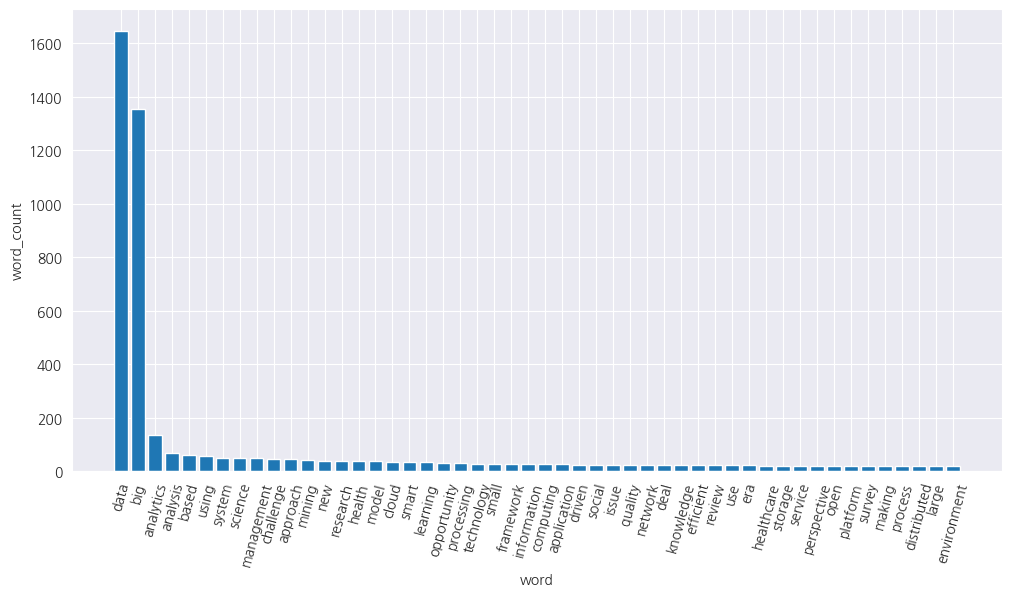

In [95]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.xlabel('word')
plt.ylabel('word_count')
plt.grid()

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)
plt.show()

In [96]:
# 결과 시각화하기
# doc_count 컬럼 추가
all_files_df['doc_count'] = 0

# 출판일 컬럼을 기준으로 그룹화하기
# 그룹별 데이터 개수를 doc_count 컬럼에 저장하기
# 새로운 DF 생성하기
summary_year = all_files_df.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

출판일  doc_count
0   1994          1
1   1995          1
2   1996          1
3   1998          3
4   2002          4
5   2003          1
6   2004          3
7   2005          3
8   2007          2
9   2008          3
10  2009          2
11  2010          3
12  2011          8
13  2012         34
14  2013         87
15  2014        154
16  2015        114
17  2016        139
18  2017        158
19  2018        130
20  2019        106
21  2020         43

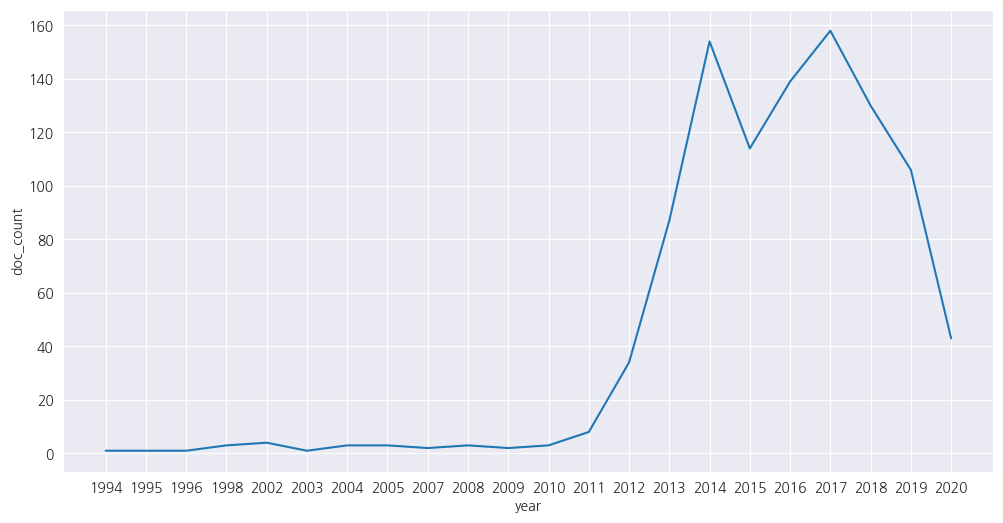

In [97]:
plt.figure(figsize=(12, 6))
plt.xlabel('year')
plt.ylabel('doc_count')
plt.grid()

plt.plot(range(len(summary_year)), summary_year.doc_count)
plt.xticks(range(len(summary_year)), [text for text in summary_year.출판일])
plt.show()

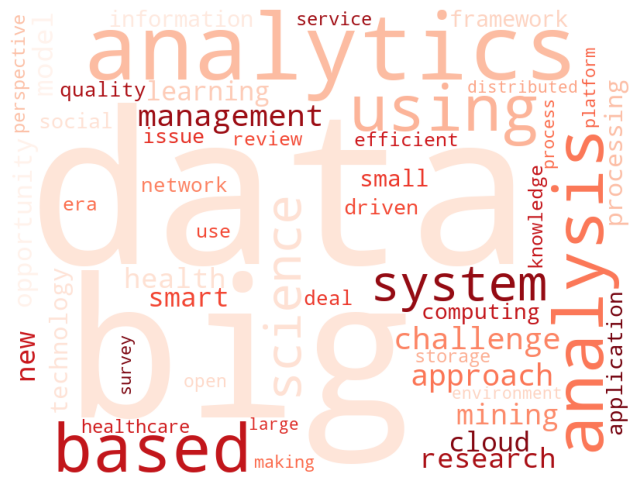

In [102]:
# 워드 클라우드 그리기
stopwords = set(STOPWORDS)

wc = WordCloud(colormap='Reds', background_color='white', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

------------------

# 한글 뉴스 기사의 키워드 분석

In [103]:
import json
import re
import matplotlib
import matplotlib.pyplot as plt

# 한글 품사 태깅을 위한 모듈
from konlpy.tag import Okt
from collections import Counter

## 데이터 준비

In [104]:
file_name = path+'etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'

with open(file_name+'.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [105]:
# 품사가 명사인 단어만 추출
message = ''

for item in data:
    if 'message' in item.keys():
        # 'message' 키의 값에서 문자/숫자가 아닌 것은 공백으로 치환하고, 연결해서 전체를 하나의 문자열로 구성하기
        message = message + re.sub(r'[^\w]', ' ', item['message']) + ''

message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

In [106]:
# 품사 태깅 패키지인 Okt 사용하기
nlp = Okt()

# 명사만 추출해서 message_N에 저장하기
message_N = nlp.nouns(message)
message_N

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

## 데이터 탐색 및 분석 모델 구축

In [107]:
# 명사를 추출해 저장한 message_N에 있는 단어들을 탐색하기
# Counter 함수를 이용해 단어별 출현 횟수를 계산하기
count = Counter(message_N)
count

Counter({'차': 23,
         '산업혁명': 22,
         '전자신문': 13,
         '산업': 10,
         '직업': 10,
         '기술': 8,
         '시대': 7,
         '라이브': 7,
         '이번': 6,
         '진흥': 6,
         '포럼': 5,
         '위': 5,
         '일자리': 5,
         '창': 5,
         '조직': 4,
         '터': 4,
         '통해': 4,
         '진행': 4,
         '스파크': 3,
         '미래': 3,
         '변화': 3,
         '사회': 3,
         '기업': 3,
         '로봇': 3,
         '등': 3,
         '노력': 3,
         '서울': 3,
         '시간': 3,
         '방송': 3,
         '대응': 3,
         '주형': 3,
         '철': 3,
         '전자': 3,
         '정보': 3,
         '이슈': 2,
         '소셜': 2,
         '우리': 2,
         '위해': 2,
         '사례': 2,
         '주요': 2,
         '국내': 2,
         '활용': 2,
         '과정': 2,
         '빅데이터': 2,
         '흐름': 2,
         '최고': 2,
         '서비스': 2,
         '영국': 2,
         '한국': 2,
         '경쟁력': 2,
         '제': 2,
         '를': 2,
         '교육': 2,
         '강': 2,
         '만구': 2,
   

In [108]:
# 출현 횟수가 많은 상위 80개의 단어 중 길이가 1보다 큰 것만 word_count dict에 저장하기
word_count = dict()

for tag, counts in count.most_common(80):
    if len(str(tag)) > 1:
        word_count[tag] = counts

word_count

{'산업혁명': 22,
 '전자신문': 13,
 '산업': 10,
 '직업': 10,
 '기술': 8,
 '시대': 7,
 '라이브': 7,
 '이번': 6,
 '진흥': 6,
 '포럼': 5,
 '일자리': 5,
 '조직': 4,
 '통해': 4,
 '진행': 4,
 '스파크': 3,
 '미래': 3,
 '변화': 3,
 '사회': 3,
 '기업': 3,
 '로봇': 3,
 '노력': 3,
 '서울': 3,
 '시간': 3,
 '방송': 3,
 '대응': 3,
 '주형': 3,
 '전자': 3,
 '정보': 3,
 '이슈': 2,
 '소셜': 2,
 '우리': 2,
 '위해': 2,
 '사례': 2,
 '주요': 2,
 '국내': 2,
 '활용': 2,
 '과정': 2,
 '빅데이터': 2,
 '흐름': 2,
 '최고': 2,
 '서비스': 2,
 '영국': 2,
 '한국': 2,
 '경쟁력': 2,
 '교육': 2,
 '만구': 2,
 '지윤': 2,
 '윤석': 2,
 '테스트': 2,
 '웍스': 2,
 '대표': 2,
 '시청': 2,
 '현장': 2,
 '소프트웨어': 2,
 '테스': 2,
 '가장': 2,
 '과제': 2,
 '대표이사': 2,
 '공공기관': 2,
 '중소기업': 2,
 '모시': 2,
 '국정': 2,
 '컨퍼런스': 2,
 '행사': 2,
 '페이스북': 2,
 '대비': 2,
 '시작': 1,
 '문제': 1}

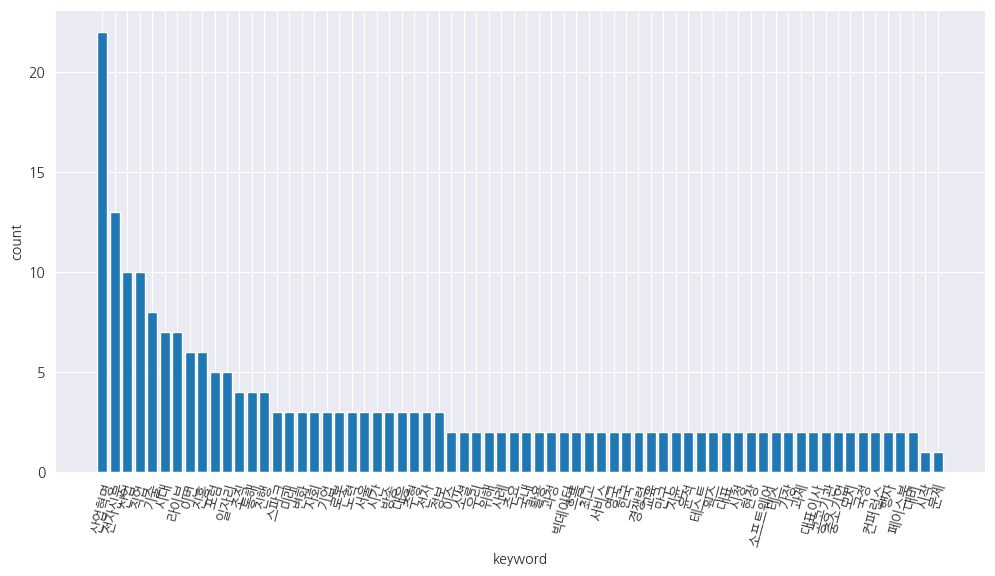

In [109]:
# 히스토그램 그리기
# 단어 빈도를 시각적으로 탐색하기
plt.figure(figsize=(12, 6))
plt.xlabel('keyword')
plt.ylabel('count')
plt.grid()

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)
plt.show()

## 결과 시각화

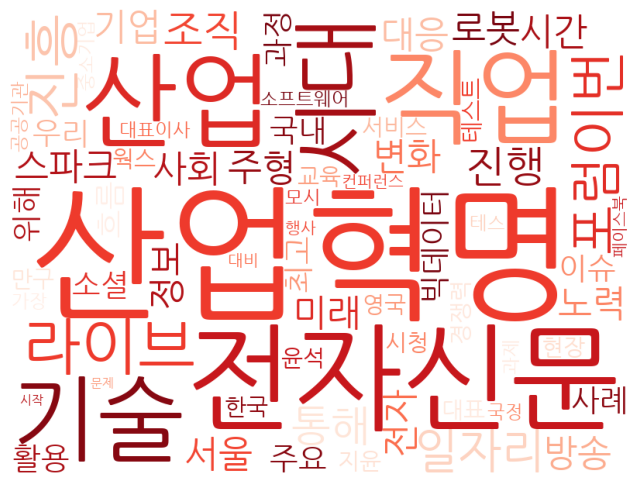

In [111]:
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
wc = WordCloud(font_path, colormap='Reds', background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

* Mecab 설치해서 사용해보기

-----------------

# TextMining - 회귀분석

## 데이터 준비

In [113]:
raw = pd.read_csv(path+'boston.csv')
boston = raw.copy()
print(boston.shape)
boston.head(2)

(506, 14)


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

       b  lstat  medv  
0  396.9   4.98  24.0  
1  396.9   9.14  21.6

In [114]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [116]:
# feature, label 분리하기
X = boston.iloc[:, :-1]
y = boston[['medv']]

# train / test 분리하기
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

## 데이터 모델링

In [117]:
# 선형회귀분석 모델 생성
model = LinearRegression()

# train data로 학습시키기
model.fit(X_train, y_train)

LinearRegression()

In [118]:
# train data를 예측하기
y_train_pred = model.predict(X_train)

# test data를 예측하기
y_test_pred = model.predict(X_test)

In [119]:
# 모델 평가하기
# 기울기
print('기울기 :', model.coef_)

# MSE
print('train MSE :', mean_squared_error(y_train, y_train_pred))
print('test MSE :', mean_squared_error(y_test, y_test_pred))

# MAE
print('train MAE :', mean_absolute_error(y_train, y_train_pred))
print('test MAE :', mean_absolute_error(y_test, y_test_pred))

# r2_score
print('train R^2 :', r2_score(y_train, y_train_pred))

기울기 : [[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]
train MSE : 22.545481487421423
test MSE : 21.51744423117734
train MAE : 3.3568267821682047
test MAE : 3.16270987145742
train R^2 : 0.7434997532004697


## 결과 시각화

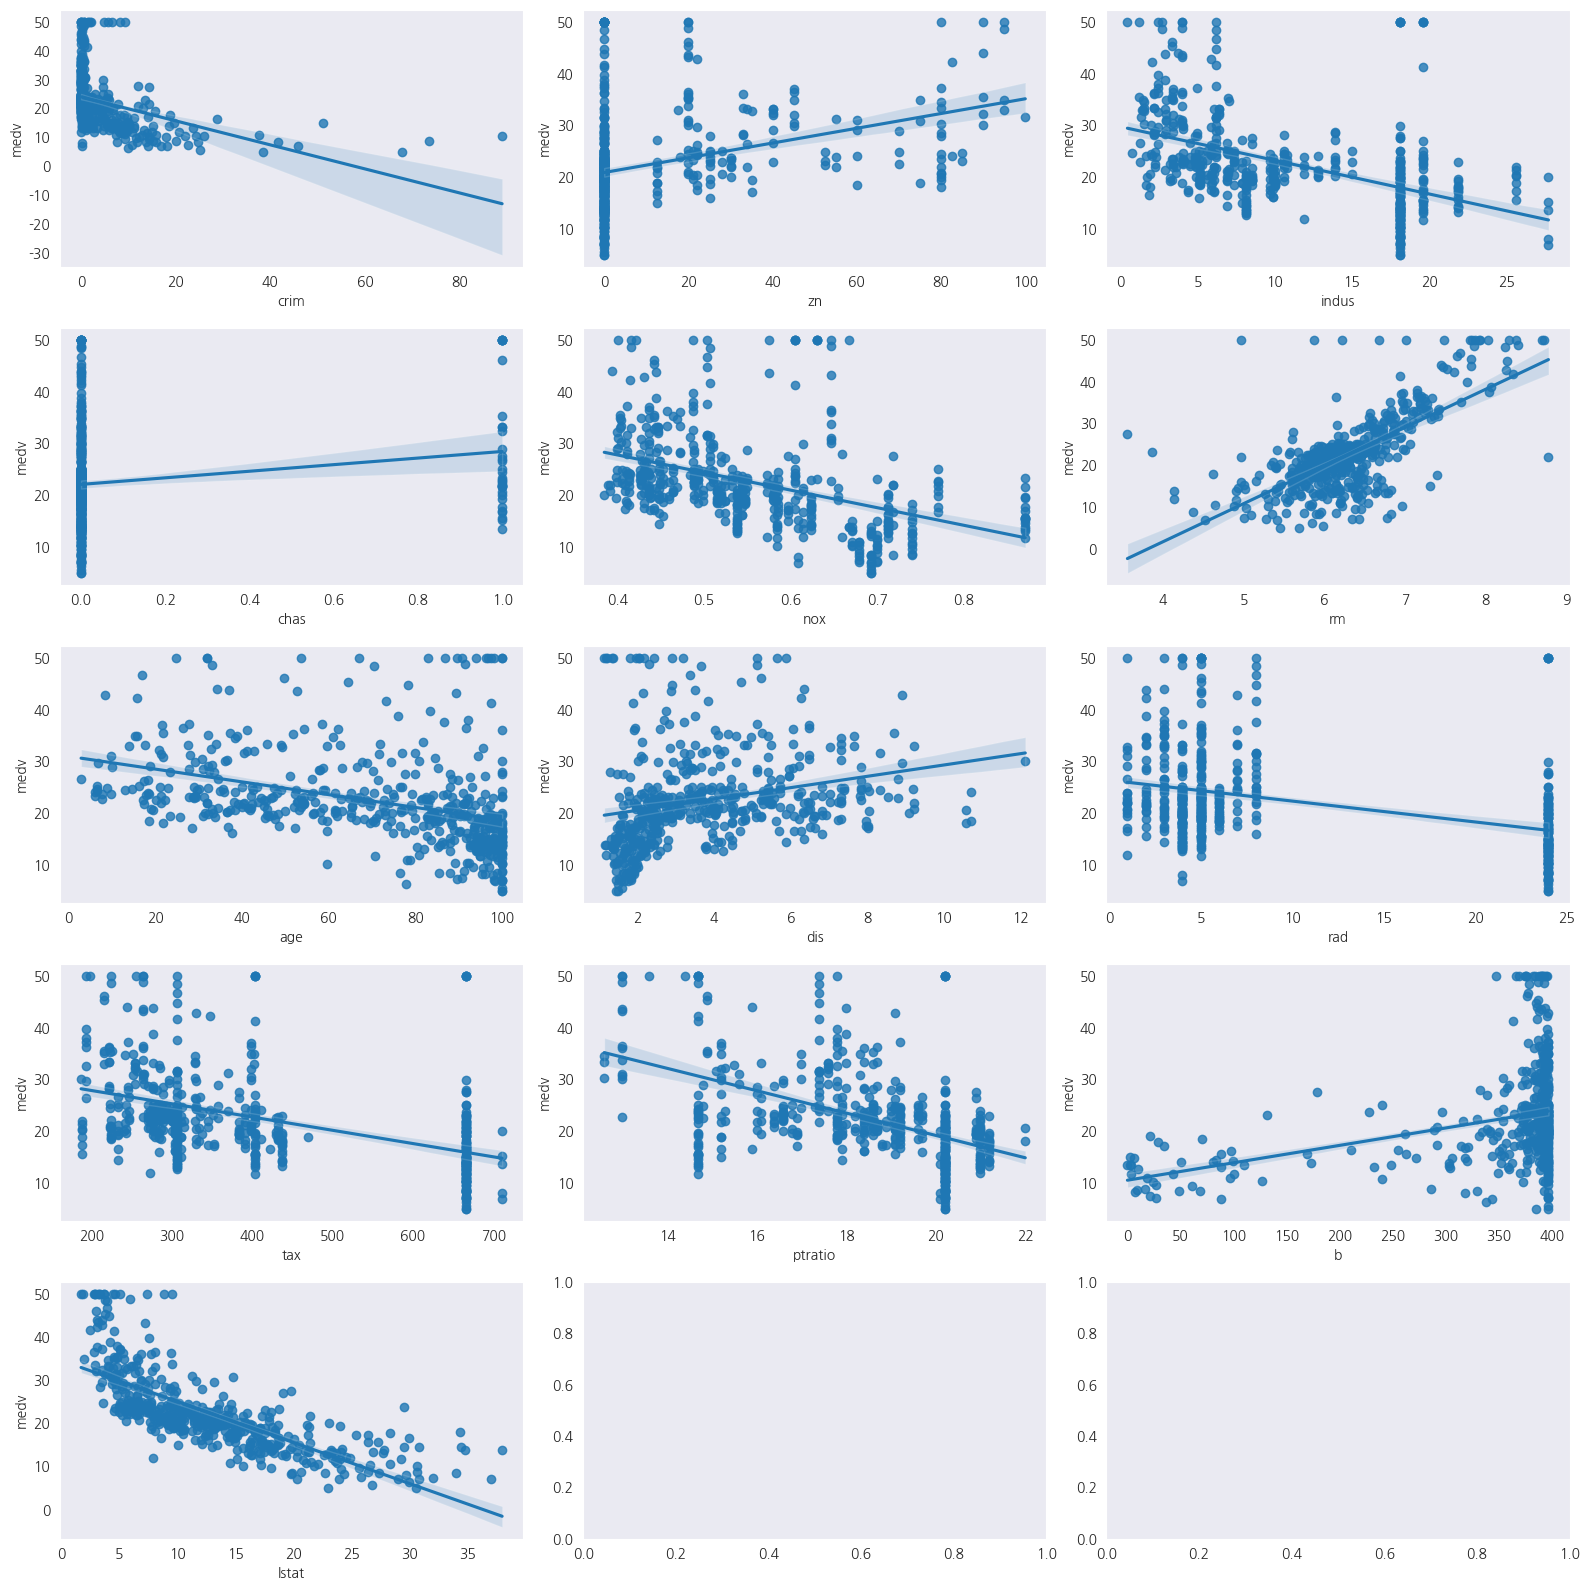

In [122]:
fig, ax = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

X_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

for i, feature in enumerate(X_features):
    row = int(i/3)
    col = i % 3
    sns.regplot(x=feature, y='medv', data=boston, ax=ax[row][col])

plt.tight_layout()
plt.show()

# 자동차 연비 예측하기
* 회귀 분석 + 산점도 선형 회귀 그래프

## 데이터 준비

In [3]:
raw = pd.read_csv(path+'auto-mpg.csv', header=0, engine='python')
auto = raw.copy()
print(auto.shape)
auto.head(2)

(398, 9)


mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320

In [4]:
# 분석에 사용하지 않는 컬럼 제거하기
auto = auto.drop(columns=['car_name', 'origin', 'horsepower'], axis=1)
auto.head(2)

mpg  cylinders  displacement  weight  acceleration  model_year
0  18.0          8         307.0    3504          12.0          70
1  15.0          8         350.0    3693          11.5          70

In [5]:
# feature, label 분리하기
X = auto.iloc[:, 1:]
y = auto[['mpg']]

# train, test data 분할하기
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'train_test_split' is not defined

## 데이터 모델링

In [128]:
# 모델 생성하기
model = LinearRegression()

# train data로 모델 훈련하기
model.fit(X_train, y_train)

# train data로 예측하기
y_train_pred = model.predict(X_train)

# test data로 예측하기
y_test_pred = model.predict(X_test)

In [129]:
# 모델 평가하기
# 회귀계수(기울기)
print('Coefficient :', model.coef_)

# y절편
print('y절편 :', model.intercept_)

# MSE
print('train MSE :', mean_squared_error(y_train, y_train_pred))
print('test MSE :', mean_squared_error(y_test, y_test_pred))

# MAE
print('train MAE :', mean_absolute_error(y_train, y_train_pred))
print('test MAE :', mean_absolute_error(y_test, y_test_pred))

# R^2
print('train R^2 :', r2_score(y_train, y_train_pred))
print('test R^2 :', r2_score(y_test, y_test_pred))

Coefficient : [[ 0.24195484 -0.00541373 -0.00652609  0.07398669  0.79088315]]
y절편 : [-18.62683717]
train MSE : 12.636836013097666
test MSE : 9.93023257280268
train MAE : 2.7028159422500626
test MAE : 2.564356487026203
train R^2 : 0.7976519140208359
test R^2 : 0.8269733998301929


## 결과 시각화

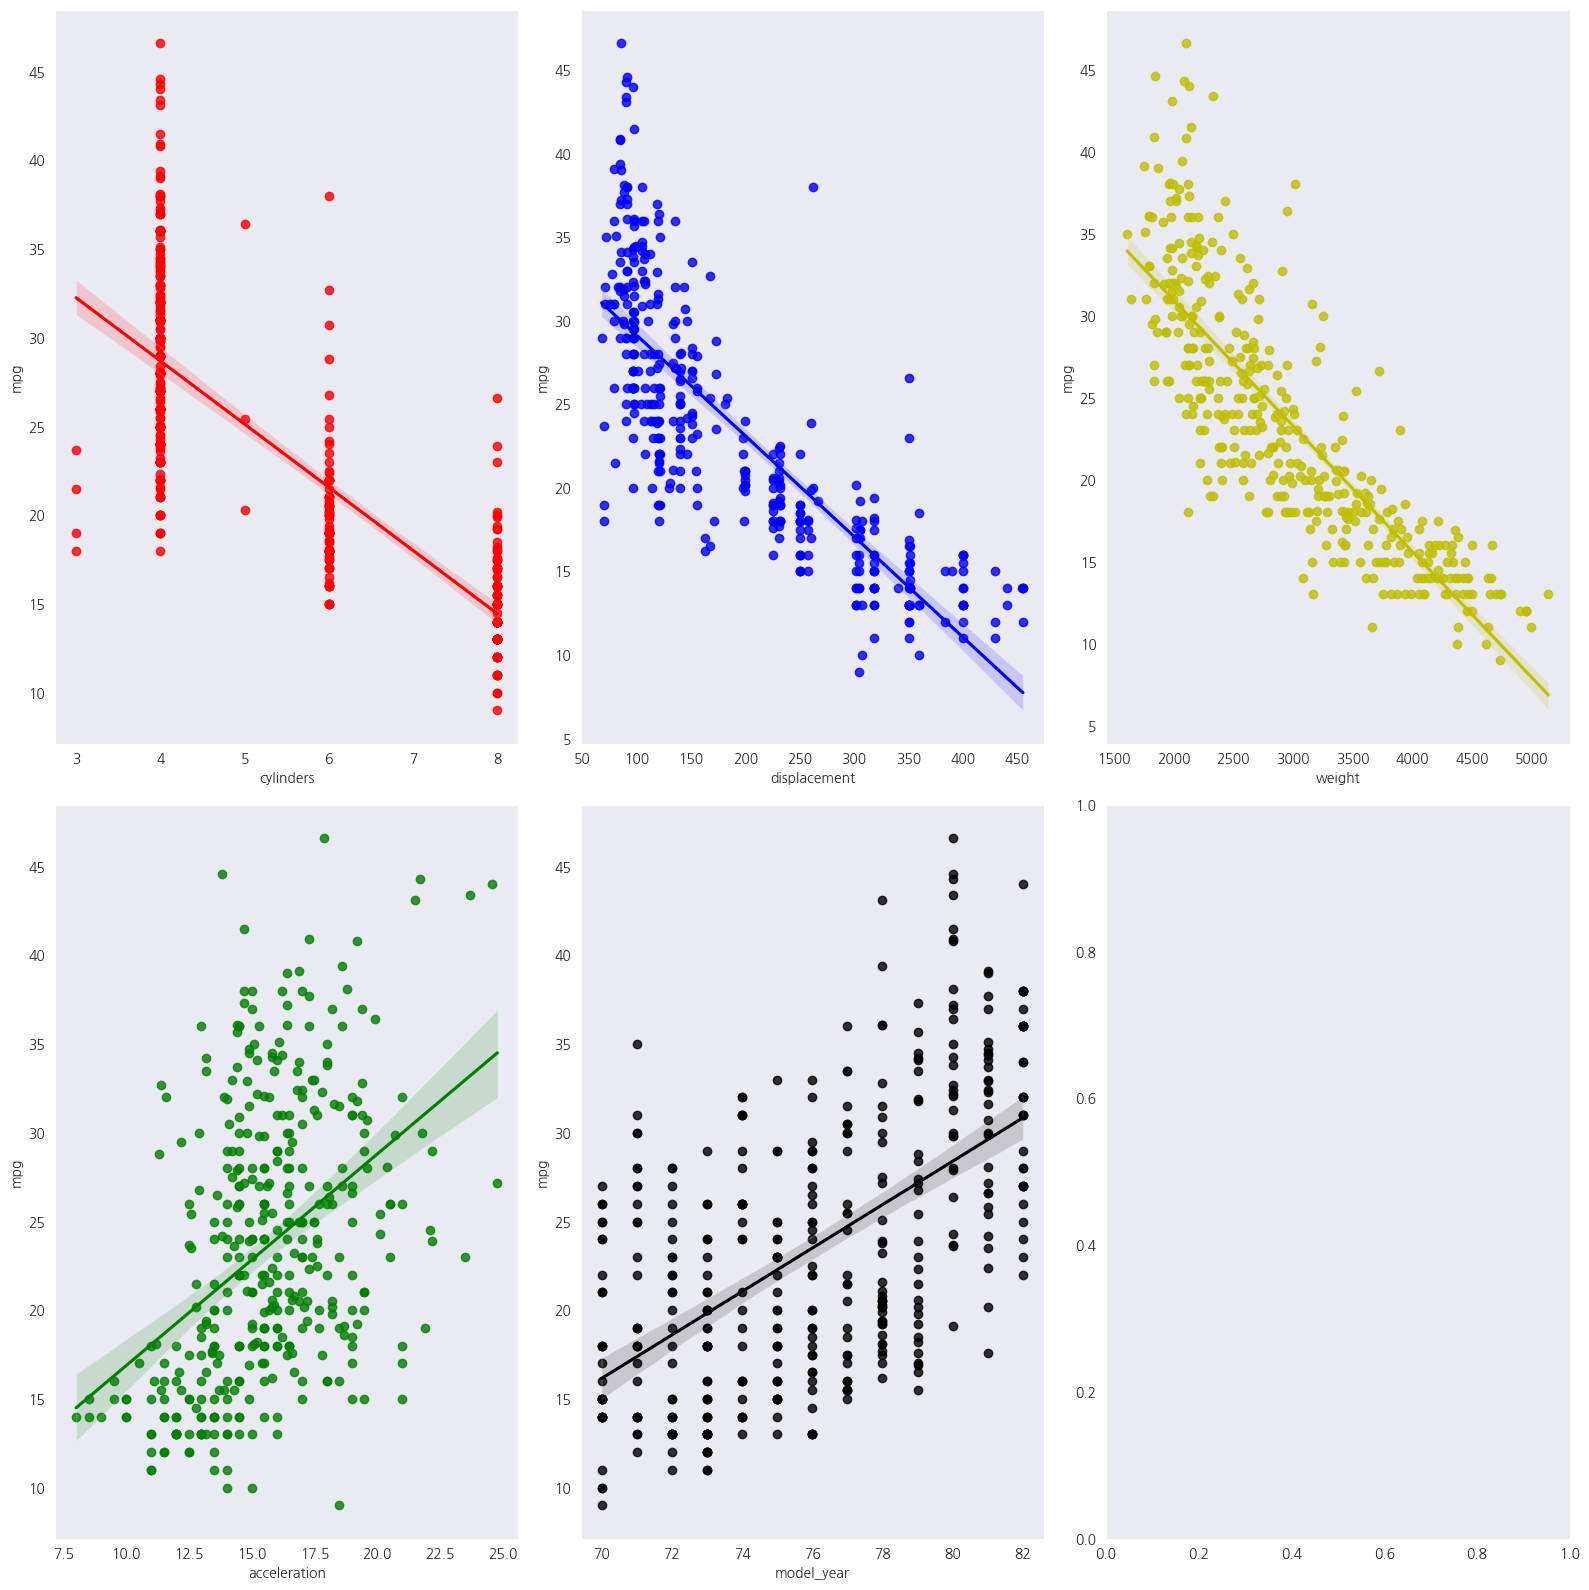

In [133]:
fig, ax = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

X_features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']
plot_color = ['r', 'b', 'y', 'g', 'k']

for i, feature in enumerate(X_features):
    row = int(i/3)
    col = i % 3
    sns.regplot(x=feature, y='mpg', data=auto, ax=ax[row][col], color=plot_color[i])

plt.tight_layout()
plt.show()

## 자동차 연비 예측 프로그램 만들기

In [136]:
def predict_car_mpg(model):
    print('='*10, '연비를 예측하고 싶은 자동차의 정보를 입력하세요.', '='*10)
    # 실린더, 기통수
    cylinder = int(input('cylinders :'))
    # 배기량
    displacement = int(input('displacement :'))
    # 무게
    weight = int(input('weight :'))
    # 엑셀
    acceleration = int(input('acceleration :'))
    # 모델 년도
    model_year = int(input('model_year :'))

    # 자동차 정보 딕셔너리에 저장하기
    car_info = {
        'cylinder' : cylinder,
        'displacement' : displacement,
        'weight' : weight,
        'acceleration' : acceleration,
        'model_year' : model_year
    }

    # 자동차 정보를 새로운 변수에 저장하기
    car_features = [list(car_info.values())]

    # 학습된 모델에 특징 넣어서 연비 예측하기
    predicted_mpg = model.predict(car_features)
    
    return predicted_mpg[0]

In [137]:
pred_mpg = predict_car_mpg(model)

print('예상 연비 :', pred_mpg)

========== 연비를 예측하고 싶은 자동차의 정보를 입력하세요. ==========


cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99


예상 연비 : [40.45564497]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


------

# TextMining 분류분석

## 데이터 준비

In [6]:
from sklearn.datasets import load_breast_cancer

# scikit learn에서 데이터셋 가져오기
cancer = load_breast_cancer()

In [7]:
# 데이터 설명 확인하기
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [8]:
# 데이터 프레임으로 만들기
breast_cancer_raw = pd.DataFrame(cancer.data, columns=cancer.feature_names)
breast_cancer = breast_cancer_raw.copy()
print(breast_cancer.shape)
breast_cancer.head(2)

(569, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  

[2 rows x 30 columns]

In [9]:
# label로 사용할 컬럼 추가하기
breast_cancer['diagnosis'] = cancer.target

## 데이터 탐색

In [10]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# 정규화
from sklearn.preprocessing import StandardScaler

# 표준정규화 해주기
# 모델링에 쓸 train 데이터의 수치를 맞춰주기 위해 !
scaler = StandardScaler()

cancer_scaled = scaler.fit_transform(cancer.data)

## 데이터 모델링

In [12]:
# 분석 모델 구축하기
# 로지스틱 회귀 이용 --> 이진 분류
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
# feature, label 분리하기
X = cancer_scaled
y = breast_cancer.diagnosis

# train, test data 분할하기
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# 모델 생성하기
model = LogisticRegression()

# train data로 모델 훈련하기
model.fit(X_train, y_train)

# train data로 예측하기
y_train_pred = model.predict(X_train)

# test data로 예측하기
y_test_pred = model.predict(X_test)

In [15]:
# 모델 평가하기
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

In [16]:
# train data 예측에 대한 평가
# 혼동행렬 확인하기
print('='*5, 'train data', '='*5)
print(confusion_matrix(y_train, y_train_pred))

# accuracy_score
print('정확도 :', accuracy_score(y_train, y_train_pred))
# precision_score
print('정밀도 :', precision_score(y_train, y_train_pred))
# recall_score
print('재현율 :', recall_score(y_train, y_train_pred))
# f1_score
print('F1 :', f1_score(y_train, y_train_pred))
# roc_auc_score
print('ROC_AUC :', roc_auc_score(y_train, y_train_pred))

===== train data =====
[[145   4]
 [  1 248]]
정확도 : 0.9874371859296482
정밀도 : 0.9841269841269841
재현율 : 0.9959839357429718
F1 : 0.9900199600798402
ROC_AUC : 0.9845691490795397


In [17]:
# test data 예측에 대한 평가
# 혼동행렬 확인하기
print('='*5, 'test data', '='*5)
print(confusion_matrix(y_test, y_test_pred))

# accuracy_score
print('정확도 :', accuracy_score(y_test, y_test_pred))
# precision_score
print('정밀도 :', precision_score(y_test, y_test_pred))
# recall_score
print('재현율 :', recall_score(y_test, y_test_pred))
# f1_score
print('F1 :', f1_score(y_test, y_test_pred))
# roc_auc_score
print('ROC_AUC :', roc_auc_score(y_test, y_test_pred))

===== test data =====
[[ 62   1]
 [  2 106]]
정확도 : 0.9824561403508771
정밀도 : 0.9906542056074766
재현율 : 0.9814814814814815
F1 : 0.986046511627907
ROC_AUC : 0.9828042328042328


# 의사결정나무

## 데이터 준비

In [18]:
features_raw = pd.read_csv(path+'features.txt', sep='\s+', header=None, names=['index', 'feature_name'])
features = features_raw.copy()
print(features.shape)
features.head(2)

(561, 2)


index       feature_name
0      1  tBodyAcc-mean()-X
1      2  tBodyAcc-mean()-Y

In [19]:
# index를 없애고 feature_name만 리스트로 저장하기
feature_name = features.iloc[:, 1].values.tolist()

In [20]:
# train, test data 준비하기
X_train = pd.read_csv(path+'train/X_train.txt', sep='\s+', header=None)
X_train.columns = feature_name

X_test = pd.read_csv(path+'test/X_test.txt', sep='\s+', header=None)
X_test.columns = feature_name

y_train = pd.read_csv(path+'train/Y_train.txt', sep='\s+', header=None)
y_train.columns = ['action']

y_test = pd.read_csv(path+'test/Y_test.txt', sep='\s+', header=None)
y_test.columns = ['action']

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [22]:
# label 확인하기
y_train.action.value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [23]:
# label 이름 확인하기
label_name = pd.read_csv(path+'activity_labels.txt', sep='\s+', header=None, names=['index', 'label'])

# index를 제거하고 label 이름을 리스트로만 저장하기
label_name = label_name.iloc[:, 1].values.tolist()

## 데이터 모델링

In [24]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성하기
model = DecisionTreeClassifier(random_state=42)

# 모델 훈련 - train data로
model.fit(X_train, y_train)

# train data 예측하기
y_train_pred = model.predict(X_train)

# test data 예측하기
y_test_pred = model.predict(X_test)

In [25]:
# 결과 분석하기
print('의사결정나무 예측 정확도 (train data) :', accuracy_score(y_train, y_train_pred))
print('의사결정나무 예측 정확도 (test data) :', accuracy_score(y_test, y_test_pred))

의사결정나무 예측 정확도 (train data) : 1.0
의사결정나무 예측 정확도 (test data) : 0.8622327790973872


### 모델 성능 개선하기

In [26]:
# 모델 파라미터 확인하기 - 의사결정나무
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [27]:
# cross validation
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
}

# 모델 생성 (파라미터 설정)
grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

# 학습하기
grid_cv.fit(X_train, y_train)

# 결과 확인
grid_cv.cv_results_

{'mean_fit_time': array([ 3.83813848,  7.19677715,  5.79923162,  5.40277324, 11.46448922,
         7.18703623,  6.07932239,  6.14253645,  6.11096544,  6.13711548]),
 'std_fit_time': array([0.70500961, 2.23151335, 1.56349663, 0.30247496, 4.01084228,
        1.27995383, 0.47773044, 0.59408971, 0.55129835, 0.59743019]),
 'mean_score_time': array([0.02218881, 0.03380523, 0.02560544, 0.02636333, 0.03891382,
        0.02821794, 0.02280879, 0.02241926, 0.02860217, 0.02221341]),
 'std_score_time': array([0.00172679, 0.00633892, 0.00386798, 0.01227623, 0.01865399,
        0.00575921, 0.00160133, 0.0020548 , 0.00471747, 0.0048378 ]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 14},
  {'max_depth'

In [28]:
# 데이터 프레임으로 만들기
gridCV_df = pd.DataFrame(grid_cv.cv_results_)
gridCV_df.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.838138      0.705010         0.022189        0.001727   
1       7.196777      2.231513         0.033805        0.006339   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               6  {'max_depth': 6}           0.806934           0.869477   
1               8  {'max_depth': 8}           0.805574           0.829368   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.810204           0.863265  ...         0.846303        0.031388   
1           0.848299           0.865306  ...         0.847941        0.029357   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.963272            0.939126   
1                1            0.985887            0.985377   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.945937            0.931826            0.944237   
1            0.984529            0.977559            0.980109   

   mean_train_score  std_train_score  
0          0.944879         0.010424  
1          0.982692         0.003281  

[2 rows x 21 columns]

In [29]:
# 컬럼 확인하기
gridCV_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [30]:
# 최고 평균 정확도, 최적의 하이퍼파라미터 확인하기
print('최고 평균 정확도 :', round(grid_cv.best_score_, 3))
print('최적의 하이퍼 파라미터 :', grid_cv.best_params_)

최고 평균 정확도 : 0.848
최적의 하이퍼 파라미터 : {'max_depth': 8}


In [31]:
# 조건 다르게 설정해서 다시 cross validation 진행하기
params = {
    'max_depth' : [6, 8, 10],
    'min_samples_split' : [8, 12, 16]
}

# 모델 생성 (파라미터 설정) 
grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

# 모델 훈련
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_split': [8, 12, 16]},
             return_train_score=True, scoring='accuracy')

In [32]:
# 결과 DF로 생성하기
gridCV_df = pd.DataFrame(grid_cv.cv_results_)
gridCV_df.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.248563      0.060527         0.027215        0.008598   
1       3.204972      0.105669         0.024418        0.003323   

  param_max_depth param_min_samples_split  \
0               6                       8   
1               6                      12   

                                      params  split0_test_score  \
0   {'max_depth': 6, 'min_samples_split': 8}           0.806934   
1  {'max_depth': 6, 'min_samples_split': 12}           0.806934   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.869477           0.809524  ...         0.846303         0.03162   
1           0.869477           0.809524  ...         0.846303         0.03162   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.962931            0.939126   
1                7            0.962931            0.939126   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.945767            0.931656            0.943897   
1            0.945767            0.931656            0.943897   

   mean_train_score  std_train_score  
0          0.944675         0.010348  
1          0.944675         0.010348  

[2 rows x 22 columns]

In [33]:
# 최고 평균 정확도, 최적의 하이퍼파라미터 확인하기
print('최고 평균 정확도 :', round(grid_cv.best_score_, 3))
print('최적의 하이퍼 파라미터 :', grid_cv.best_params_)

최고 평균 정확도 : 0.856
최적의 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 12}


In [34]:
# 최적의 하이퍼 파라미터가 설정된 모델 변수에 넣기
best_model = grid_cv.best_estimator_

# 예측하기
best_pred = best_model.predict(X_test)

# 정확도 확인하기
best_acc = accuracy_score(y_test, best_pred)

print('최적 모델의 정확도 :', round(best_acc, 3))

최적 모델의 정확도 : 0.872


In [35]:
# 중요 속성 확인하기
feature_importance = best_model.feature_importances_

# Series로 만들기
feature_importance_df = pd.Series(feature_importance, index=X_train.columns)

# 중요 속성 TOP 10 확인하기
feature_importance_top10 = feature_importance_df.sort_values(ascending=False)[:10]

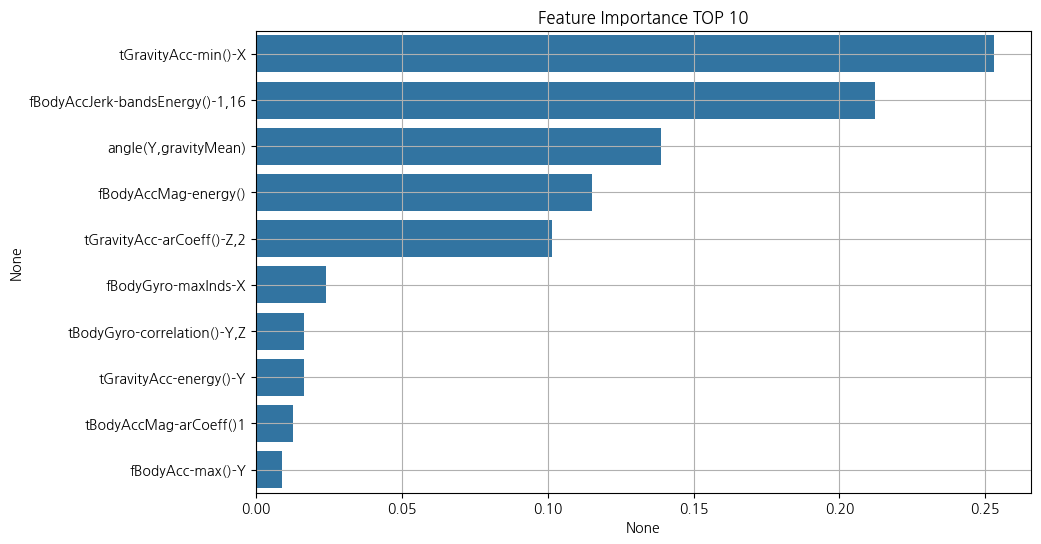

In [36]:
# 시각화
plt.figure(figsize=(10, 6))
plt.title('Feature Importance TOP 10')
sns.barplot(x=feature_importance_top10, y=feature_importance_top10.index)
plt.grid()
plt.show()

In [191]:
# graphviz 설치하기
# !pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [37]:
from sklearn.tree import export_graphviz

# export_graphviz 호출하기 --> 결과물을 out_file로 저장하기
export_graphviz(best_model, out_file='best_tree.dot', class_names=label_name, feature_names=feature_name, filled=True)

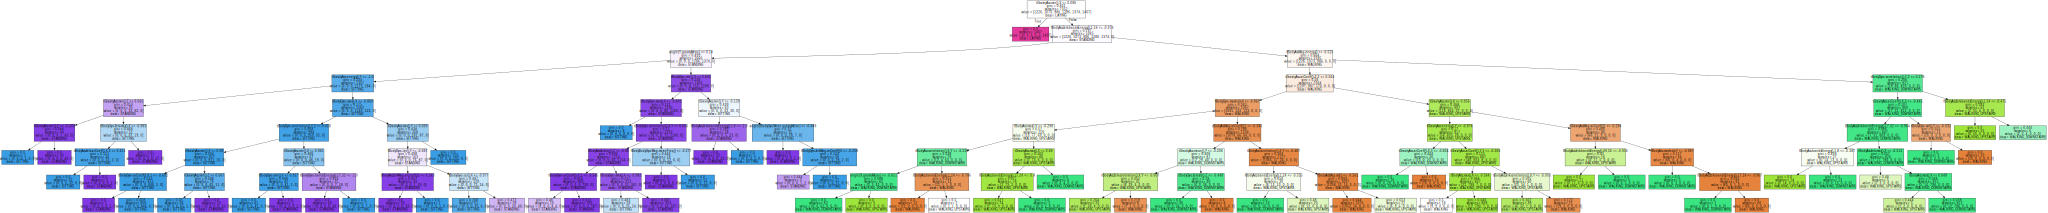

In [38]:
import graphviz

with open('best_tree.dot') as file:
    dot_tree = file.read()

graphviz.Source(dot_tree)

-------

# TextMining 군집분석

* KMeans
    * k개의 centeroid를 임의로 설정한 후, centeroid의 이동을 확인하며 군집을 만들어간다.
    * 유클리드 거리 사용

## 데이터 준비

In [39]:
raw = pd.read_excel(path+'Online_Retail.xlsx')
retail = raw.copy()
print(retail.shape)
retail.head(2)

(541909, 8)


InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [40]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [41]:
# quantity 확인하기
retail.Quantity.value_counts() # (-)가 있음.

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

In [42]:
# 단위 당 가격 확인
retail.UnitPrice.value_counts()

UnitPrice
1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: count, Length: 1630, dtype: int64

In [43]:
# customerID 확인
retail.CustomerID.value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [44]:
# 조건 넣어서 데이터 정제하기
condition = retail.CustomerID.notnull()

retail_new = retail[condition]
print(retail_new.shape)
retail_new.head(2)

(406829, 8)


InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [45]:
retail_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [46]:
# customerID int로 변경하기
retail_new.CustomerID = retail_new.CustomerID.astype(int)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_19148\3112549050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_new.CustomerID = retail_new.CustomerID.astype(int)


In [48]:
# 중복 확인하기
retail_new.drop_duplicates(inplace=True)
print(retail_new.shape)
retail_new.info()

(401604, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int32         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.0+ MB


C:\Users\tjdtn\AppData\Local\Temp\ipykernel_19148\1539488248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_new.drop_duplicates(inplace=True)


In [50]:
# 제품 수, 거래 건수, 고객 수 알아보기
pd.DataFrame(
    [
    {
        'product' : len(retail_new.StockCode.value_counts()),
        'transaction' : len(retail_new.InvoiceNo.value_counts()),
        'customer' : len(retail_new.CustomerID.value_counts())
    }
    ],
    index=['counts']
)

product  transaction  customer
counts     3684        22190      4372

In [51]:
# 국적 알아보기
retail_new.Country.value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [53]:
# 주문 금액 컬럼 추가하기
# 주문 금액 = 제품 단가 * 주문 개수
retail_new['SaleAmount'] = retail_new.UnitPrice * retail_new.Quantity
retail_new.head(2)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_19148\183950386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_new['SaleAmount'] = retail_new.UnitPrice * retail_new.Quantity


InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  SaleAmount  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34

In [54]:
# 각 고객의 정보 추출하기 - DF 만들기
# CustomerID를 기준으로 그룹 만들기
# 주문 쵯수 계산 >> InvoiceNo : count
# 주문 금액 총액 >> SaleAmount : sum
# 주문일 중 최근 날짜 >> InvoiceDate : max

aggregations = \
{
    'InvoiceNo' : 'count',
    'SaleAmount' : 'sum',
    'InvoiceDate' : 'max'
}

customers = retail_new.groupby('CustomerID').agg(aggregations).reset_index()
customers.head(2)

CustomerID  InvoiceNo  SaleAmount         InvoiceDate
0       12346          2         0.0 2011-01-18 10:17:00
1       12347        182      4310.0 2011-12-07 15:52:00

In [57]:
# customers DF의 컬럼명 변경하기
customers = customers.rename(columns={'InvoiceNo' : 'Freq', 'InvoiceDate' : 'ElapsedDays'})
customers.head(2)

CustomerID  Freq  SaleAmount         ElapsedDays
0       12346     2         0.0 2011-01-18 10:17:00
1       12347   182      4310.0 2011-12-07 15:52:00

In [59]:
import datetime

# 마지막 주문일로부터 며칠이 지났는지에 대한 값을 ElapsedDays 컬럼에 저장하기
# 기준날짜 : 2011.12.10
customers['ElapsedDays'] = datetime.datetime(2011, 12, 10) - customers.ElapsedDays

# 날짜수로 환산하기
customers.ElapsedDays = customers.ElapsedDays.apply(lambda x: x.days+1)

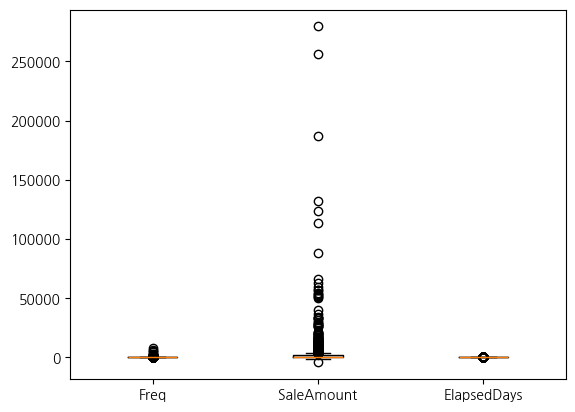

In [70]:
# boxplot 그리기
fig, ax = plt.subplots()

ax.boxplot([customers.Freq, customers.SaleAmount, customers.ElapsedDays])
# x축 눈금명 변경
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show()

In [114]:
for i, row in customers.iterrows():
    if row[2] < 0:
        customers.iloc[i, 2] = abs(row[2])

customers[customers.SaleAmount < 0]

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_19148\1337399615.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[2] < 0:
C:\Users\tjdtn\AppData\Local\Temp\ipykernel_19148\1337399615.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  customers.iloc[i, 2] = abs(row[2])


Empty DataFrame
Columns: [CustomerID, Freq, SaleAmount, ElapsedDays, Freq_log, SaleAmount_log, ElapsedDays_log]
Index: []

In [115]:
# 로그변환을 이용해 데이터 값의 분포 맞춰주기
customers['Freq_log'] = np.log1p(customers['Freq'])
customers['SaleAmount_log'] = np.log1p(customers['SaleAmount'])
customers['ElapsedDays_log'] = np.log1p(customers['ElapsedDays'])
customers.head(2)

CustomerID  Freq  SaleAmount  ElapsedDays  Freq_log  SaleAmount_log  \
0       12346     2         0.0          326  1.098612        0.000000   
1       12347   182      4310.0            3  5.209486        8.368925   

   ElapsedDays_log  
0         5.789960  
1         1.386294

In [116]:
customers.isnull().sum()

CustomerID         0
Freq               0
SaleAmount         0
ElapsedDays        0
Freq_log           0
SaleAmount_log     0
ElapsedDays_log    0
dtype: int64

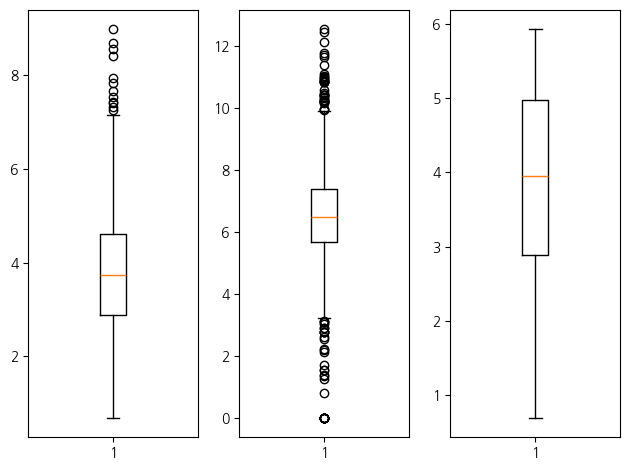

In [117]:
# 다시 boxplot 그리기
fig, ax = plt.subplots(1, 3)

for i in range(3):
    ax[i].boxplot([customers[customers.columns[i+4]]])
    # x축 눈금명 변경
    # ax[i].set_xticks([1], ['Freq_log'])
plt.tight_layout()
plt.show()

## 데이터 모델링 KMeans

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [119]:
X_features = customers[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values

In [120]:
# 정규분포로 scaling하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_features_scaled = scaler.fit_transform(X_features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

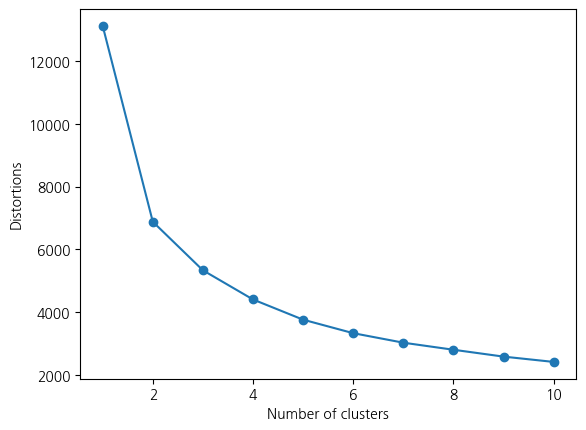

In [121]:
# 최적의 K값 찾기
# Elbow
distortions = []

for i in range(1, 11):
    # 모델 생성
    kmeans = KMeans(n_clusters=i, random_state=42)
    # 모델 훈련
    kmeans.fit(X_features_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

In [122]:
# k = 3일 때 확인
kmeans = KMeans(n_clusters=3, random_state=42)

# 예측하기
y_pred = kmeans.fit_predict(X_features_scaled)
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 0, 2, 0])

In [123]:
customers['cluster'] = y_pred
customers.head(2)

CustomerID  Freq  SaleAmount  ElapsedDays  Freq_log  SaleAmount_log  \
0       12346     2         0.0          326  1.098612        0.000000   
1       12347   182      4310.0            3  5.209486        8.368925   

   ElapsedDays_log  cluster  
0         5.789960        1  
1         1.386294        2

In [124]:
customers.cluster.value_counts()

cluster
0    1833
1    1488
2    1051
Name: count, dtype: int64

In [130]:
# 최적의 k값 찾기
# 실루엣 점수 확인하기
from matplotlib import cm

def silhoutte_viz(k, x_features):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x_features)

    silhouette_values = silhouette_samples(x_features, y_pred, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_higher = 0, 0
    y_ticks = []

    for c in range(k):
        c_silhouette = silhouette_values[y_pred == c]
        c_silhouette.sort()
        y_ax_higher += len(c_silhouette)

        color = cm.jet(float(c) / k)
        plt.barh(range(y_ax_lower, y_ax_higher), c_silhouette, height=1.0, edgecolor='none', color=color)

        y_ticks.append((y_ax_lower + y_ax_higher) / 2)
        y_ax_lower += len(c_silhouette)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title(f'Number of Cluster : {k}\nSilhouette Score : {round(silhouette_avg, 3)}')
    plt.ylabel('Cluster')
    plt.yticks(y_ticks, range(k))
    plt.xlabel('Silhouette coefficient')
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


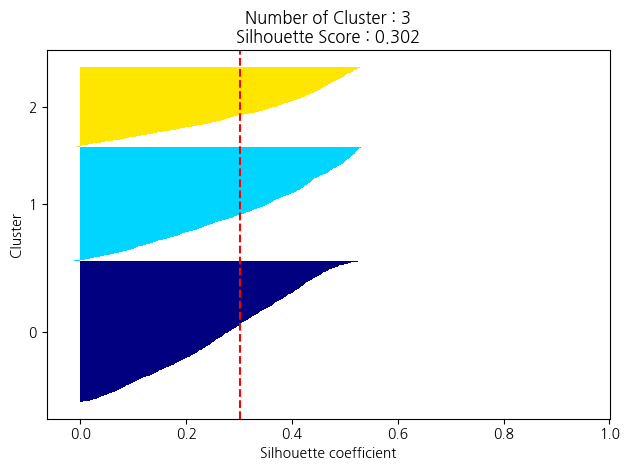

In [131]:
# 실루엣 점수 확인하기 --> k=3
silhoutte_viz(3, X_features_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


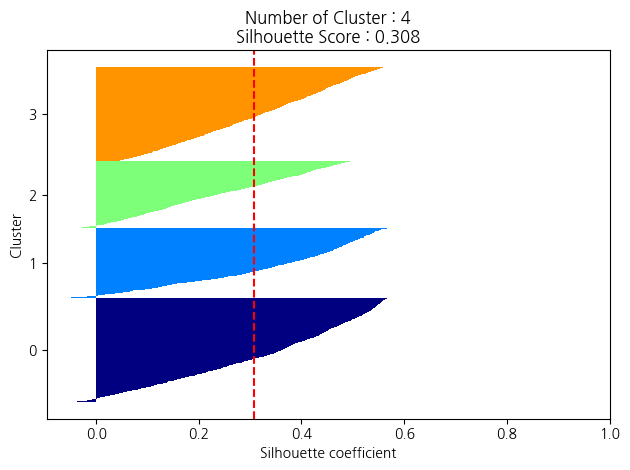

In [132]:
# 실루엣 점수 확인하기 --> k=4
silhoutte_viz(4, X_features_scaled)

In [135]:
# Cluster 수에 따른 cluster 데이터 분포 시각화하기
def clusterScatter(k, x_features):
    c_color = []
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x_features)

    # cluster 색 지정하기
    for i in range(k):
        color = cm.jet(float(i) / k)
        c_color.append(color)

        # cluster 안의 데이터 분포를 산점도로 표현하기
        plt.scatter(x_features[y_pred == i, 0], x_features[y_pred == i, 1],
                    marker='o', color=color, s=50, edgecolors='black',
                    label='cluster' + str(i))
    
    # centroid 표시하기
    for i in range(k):
        plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1],
                    marker='*', color=c_color[i], edgecolors='white', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


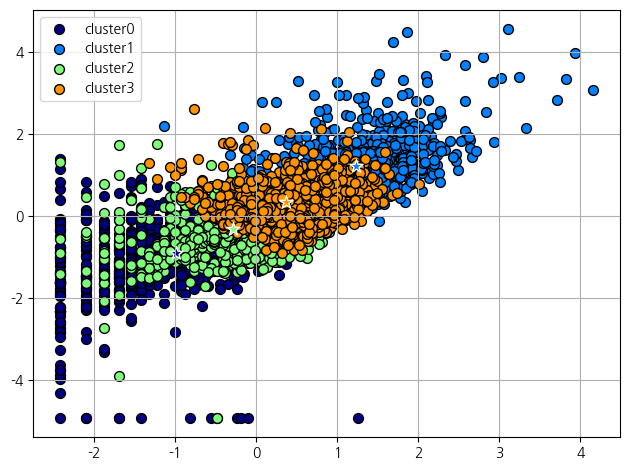

In [136]:
clusterScatter(4, X_features_scaled)

In [138]:
# 군집의 중앙 확인하기
kmeans.cluster_centers_

array([[ 0.13696495,  0.08630393, -0.03022401],
       [-0.9853016 , -0.91538489,  0.81656865],
       [ 1.15310892,  1.14251522, -1.10053865]])

In [139]:
# 결정된 k를 적용해 최적의 KMeans 모델 사용하기
best_k = 4 # 실루엣 점수로 확인함.

# 모델 생성
kmeans = KMeans(n_clusters=best_k, random_state=42)

# 모델 학습과 예측을 동시에 수행하기
y_pred = kmeans.fit_predict(X_features_scaled)

# 예측한 cluster를 컬럼으로 만들기
customers['cluster'] = y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [140]:
customers.head(2)

CustomerID  Freq  SaleAmount  ElapsedDays  Freq_log  SaleAmount_log  \
0       12346     2         0.0          326  1.098612        0.000000   
1       12347   182      4310.0            3  5.209486        8.368925   

   ElapsedDays_log  cluster  
0         5.789960        0  
1         1.386294        1

In [141]:
# 군집 수 확인하기 -  방법 1
pd.DataFrame(data={'count' : customers.cluster.value_counts().values}, index=customers.cluster.value_counts().index).sort_index()

count
cluster       
0         1355
1          908
2          877
3         1232

In [143]:
# 군집 수 확인하기 -  방법 2
customers.groupby('cluster')['CustomerID'].count()

cluster
0    1355
1     908
2     877
3    1232
Name: CustomerID, dtype: int64

## 결과 확인

In [145]:
# log 변환한 컬럼 삭제한 DF 만들기
customer_cluster = customers.drop(columns=['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])

# 주문 1회당 평균 구매 금액 : SaleAmount_avg
customer_cluster['SaleAmount_avg'] = customer_cluster.SaleAmount / customer_cluster.Freq

customer_cluster.head(2)

CustomerID  Freq  SaleAmount  ElapsedDays  cluster  SaleAmount_avg
0       12346     2         0.0          326        0        0.000000
1       12347   182      4310.0            3        1       23.681319

In [147]:
# 클러스터별로 분석하기
cluster_avg_df = customer_cluster.drop(columns=['CustomerID']).groupby('cluster').mean()
cluster_avg_df.index += 1

In [148]:
cluster_avg_df

Freq   SaleAmount  ElapsedDays  SaleAmount_avg
cluster                                                      
1         14.918819   280.766908   190.800000       43.970344
2        277.833700  6375.887412    12.791850       29.415620
3         36.207526   571.274812    20.163056       32.242059
4         79.027597  1326.481139    94.913149       24.042679